In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import os
import time
import gc
import scipy
from scipy.signal import butter, filtfilt, argrelextrema
from scipy.interpolate import interp1d
from tqdm import tqdm

In [3]:

# improve the ploting style
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 22
rcParams['mathtext.fontset'] = 'stix'

In [ ]:
# transform_data = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.RandomCrop(32,padding=4),
#     # transforms.RandomRotation(40)
#     # transforms.Lambda(lambda x : x + 0.5*torch.rand_like(x)),
#     # transforms.Lambda(lambda x: x.clamp(0,1)),
#     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) # Apply the (x - mean)/var operation on the components of the data # if x is in [0,1] then Normalise(x) is in [-1,1] # is applied on the three channels RGB
# ])

# # Data import
# dtype = torch.float32
# trainset = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder('train',transform = transform_data),  batch_size = 1)
# validset = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder('valid', transform = transform_data), batch_size = 1)
# testset = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder('test', transform = transform_data), batch_size = 1)

# # Data conversion to tensors
# x_train = []
# y_train = []
# x_valid = []
# y_valid = []
# x_test = []
# y_test = []
# for x, y in tqdm(trainset, desc="Chargement train"):
#     x_train.append(x)
#     y_train.append(y)
# for x, y in tqdm(validset, desc="Chargement train"):
#     x_valid.append(x)
#     y_valid.append(y)
# for x, y in tqdm(testset, desc="Chargement train"):
#     x_test.append(x)
#     y_test.append(y)

# x_train = torch.squeeze(torch.tensor(np.array(x_train)))
# y_train = torch.squeeze(torch.tensor(np.array(y_train)))
# x_valid = torch.squeeze(torch.tensor(np.array(x_valid)))
# y_valid = torch.squeeze(torch.tensor(np.array(y_valid)))
# x_test = torch.squeeze(torch.tensor(np.array(x_test)))
# y_test = torch.squeeze(torch.tensor(np.array(y_test)))

# # Saving datas to tensors
# torch.save({'inputs' : x_train, 'targets' : y_train}, 'datas/CINIC-10_trainset_cropped.pt')
# torch.save({'inputs' : x_valid, 'targets' : y_valid}, 'datas/CINIC-10_validset_cropped.pt')
# torch.save({'inputs' : x_test, 'targets' : y_test}, 'datas/CINIC-10_testset_cropped.pt')

Chargement train: 100%|██████████| 90000/90000 [00:16<00:00, 5489.26it/s]


torch.Size([540000, 32, 32, 3]) torch.Size([540000]) torch.Size([90000, 32, 32, 3]) torch.Size([90000])
torch.Size([540000, 10]) torch.Size([90000, 10])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.75686276..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.79607844..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392..0.7882353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.81960785].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7411765..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.96862745..0.77254903].
Clipping i

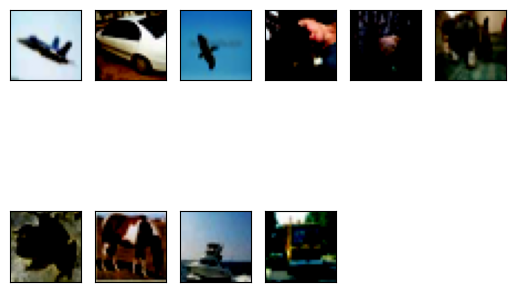

torch.Size([108000, 32, 32, 3]) torch.Size([108000, 1]) tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]) torch.Size([18000, 32, 32, 3]) torch.Size([18000, 1])


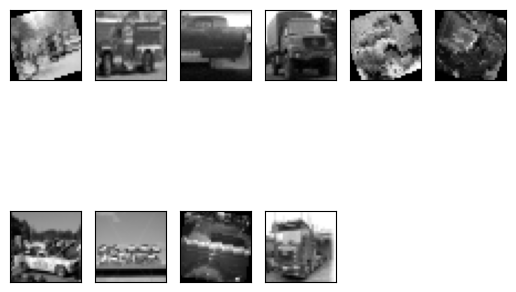

torch.Size([108000, 1024]) torch.Size([18000, 1024])


In [18]:
dtype = torch.float32

x_train, y_train_raw = torch.load('datas/CINIC-10_trainset.pt')['inputs'], torch.load('datas/CINIC-10_trainset.pt')['targets']
x_valid, y_valid_raw = torch.load('datas/CINIC-10_validset.pt')['inputs'], torch.load('datas/CINIC-10_validset.pt')['targets']
x_test, y_test = torch.load('datas/CINIC-10_testset.pt')['inputs'], torch.load('datas/CINIC-10_testset.pt')['targets']

x_train_rotated, y_train_raw_rotated = torch.load('datas/CINIC-10_trainset_rotated.pt')['inputs'], torch.load('datas/CINIC-10_trainset_rotated.pt')['targets']
x_valid_rotated, y_valid_raw_rotated = torch.load('datas/CINIC-10_validset_rotated.pt')['inputs'], torch.load('datas/CINIC-10_validset_rotated.pt')['targets']
x_test_rotated, y_test_rotated = torch.load('datas/CINIC-10_testset_rotated.pt')['inputs'], torch.load('datas/CINIC-10_testset_rotated.pt')['targets']

x_train_noised, y_train_raw_noised = torch.load('datas/CINIC-10_trainset_noised.pt')['inputs'], torch.load('datas/CINIC-10_trainset_noised.pt')['targets']
x_valid_noised, y_valid_raw_noised = torch.load('datas/CINIC-10_validset_noised.pt')['inputs'], torch.load('datas/CINIC-10_validset_noised.pt')['targets']
x_test_noised, y_test_noised = torch.load('datas/CINIC-10_testset_noised.pt')['inputs'], torch.load('datas/CINIC-10_testset_noised.pt')['targets']


# x_train, y_train_raw = torch.cat((x_train, x_test), dim=0).permute(0,2,3,1), torch.cat((y_train_raw, y_test), dim=0)
# x_train, y_train_raw = torch.cat((x_train, x_test, x_train_rotated, x_test_rotated), dim=0).permute(0,2,3,1), torch.cat((y_train_raw, y_test, y_train_raw_rotated, y_test_rotated), dim=0)
x_train, y_train_raw = torch.cat((x_train, x_test, x_train_rotated, x_test_rotated, x_train_noised, x_test_noised), dim=0).permute(0,2,3,1), torch.cat((y_train_raw, y_test, y_train_raw_rotated, y_test_rotated, y_train_raw_noised, y_test_noised), dim=0)


x_valid = x_valid.permute(0,2,3,1)
print(x_train.shape, y_train_raw.shape, x_valid.shape, y_valid_raw.shape)


# Modification du format des données shape (n_data,1) -> (n_data, n_classes)
y_train = torch.zeros((y_train_raw.shape[0], int(torch.max(y_train_raw)+1)))
for i, y in enumerate(y_train_raw):
    j = int(y.item())
    y_train[i,j] = 1

y_valid = torch.zeros((y_valid_raw.shape[0], int(torch.max(y_valid_raw)+1)))
for i,y in enumerate(y_valid_raw):
    j = int(y.item())
    y_valid[i,j] = 1 
print(y_train.shape, y_valid.shape)

# Binary reduction of the classes # To avoid using softmax, we regroup classes in two classes
class_binary_reduction = True
determination_des_classes = True
black_and_white_images = True

if class_binary_reduction :
    if determination_des_classes :
        # Determination des classes
        class_list = []
        class_index = 0
        for i in range (x_train.shape[0]):
            if y_train[i, class_index] == 1:
                class_list.append(x_train[i])
                class_index += 1
            if len(class_list) == len(y_train[0]):
                break
        for i, image in enumerate(class_list):
            plt.subplot(2, int(len(class_list)/2+1),i+1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
        plt.show()
                
    # classe1 = [0, 1, 8, 9]  # vehicles
    # classe2 = [2, 3, 4, 5]  # animals
    
    # classe1 = [1, 3, 4]  # elk, truck, dog
    # classe2 = [5, 7, 9]  # horse, car, cat

    classe1 = [1]  # car
    classe2 = [9]  # truck
    
    # Création des masques pour les échantillons appartenant à ces classes
    mask_classe1_train = y_train[:, classe1].sum(dim=1) > 0  # True si appartient à classe1
    mask_classe2_train = y_train[:, classe2].sum(dim=1) > 0  # True si appartient à classe2
    
    mask_classe1_valid = y_valid[:, classe1].sum(dim=1) > 0
    mask_classe2_valid = y_valid[:, classe2].sum(dim=1) > 0
    
    # Filtrage des exemples concernés
    mask_train = torch.logical_or(mask_classe1_train, mask_classe2_train)
    mask_valid = torch.logical_or(mask_classe1_valid, mask_classe2_valid)
    x_train, y_train = x_train[mask_train], y_train[mask_train]
    x_valid, y_valid = x_valid[mask_valid], y_valid[mask_valid]

    # Création du vecteur de labels binaires (1 pour classe1, 0 pour classe2)
    y_train = (y_train[:, classe1].sum(dim=1) > 0).to(dtype).unsqueeze(1)
    y_valid = (y_valid[:, classe1].sum(dim=1) > 0).to(dtype).unsqueeze(1)

    print(x_train.shape, y_train.shape, y_train[0:10], x_valid.shape, y_valid.shape)

if black_and_white_images :
    x_train = 0.299*x_train[:,:,:,0] + 0.587*x_train[:,:,:,1] + 0.114*x_train[:,:,:,2]
    x_valid = 0.299*x_valid[:,:,:,0] + 0.587*x_valid[:,:,:,1] + 0.114*x_valid[:,:,:,2]
    for i, image in enumerate(x_train[torch.randperm(x_train.shape[0])[:10]]):
        plt.subplot(2, int(len(x_train[0:10])/2+1),i+1)
        plt.imshow(image, cmap = 'grey')
        plt.xticks([])
        plt.yticks([])
    plt.show()
    x_train, x_valid = (x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])).to(dtype), x_valid.reshape(x_valid.shape[0], x_valid.shape[1]*x_valid.shape[2]).to(dtype)
    print(x_train.shape, x_valid.shape)

else :    
    x_train, x_valid = (x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])).to(dtype), x_valid.reshape(x_valid.shape[0], x_valid.shape[1]*x_valid.shape[2]*x_valid.shape[3]).to(dtype)
    print(x_train.shape, x_valid.shape)

In [19]:
dtype = torch.float32

# if torch.backends.mps.is_available():
#     device = torch.device("mps")
# else :
device = torch.device("cpu")
print("Computing on : ", device)

def ReLU(x):
    return torch.max(torch.tensor(0).to(device),x)

def ReLU_derivative(x):
    return (x>0).type(dtype).to(device)

def softmax_derivative(s):
    """
    s : Tensor de shape (n_batch, num_classes), déjà softmaxé
    Renvoie : Tensor de shape (n_batch, num_classes, num_classes) contenant la jacobienne de softmax pour chaque échantillon
    """
    s = s.to(device)
    n, C = s.shape
    jacobians = torch.zeros(n, C, C, dtype=s.dtype).to(device) # Initialisation du tenseur Jacobien (n_batch, num_classes, num_classes) => (i,j,k) = dérivée de softmax au logit j du ième batch par rapport au logit k du même batch
    for i in range(n):  # Pour chaque échantillon du batch, on calcule la jacobienne de softmax
        si = s[i].unsqueeze(1)  # shape (C, 1) # vecteur softmax(logits) pour la i-ème donnée du batch
        jacobians[i] = torch.diagflat(si) - torch.mm(si,si.t()) # calcul de la jacobienne (matrice des dérivées croisées) de softmax au point z_i = vect(logits_i) # shape (C, C) -> Indice du Jacobien : lignes, Indice des logits : colonnes
    return jacobians

def sigmoid(x):
    return 1/(1+torch.exp(-x))

def sigmoid_derivative(x):
    return torch.exp(-x)/((1 + torch.exp(-x))**2)

def tanh_derivative(x):
    return (1 - (torch.tanh(x)**2)).to(device)

class two_layer_NN(nn.Module):
    def __init__(self,input_dimension,hidden_1_size,number_of_classes,lr=1e-3, reg1 = 0, reg2 = 0, eps_init=1, fraction_batch=0.01, observation_rate = 100):
        """
        Constructor of the two-layer neural network class.
        """
        super(two_layer_NN,self).__init__()
        self.architecture = ""
        self.input_dimension = input_dimension
        self.hidden_1_size = hidden_1_size
        self.number_of_classes = number_of_classes
        self.lr = lr
        self.eps_init = eps_init
        self.reg1 = reg1
        self.reg2 = reg2
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        self.training_time = 0
        # Initializing layers and bias        
        self.W1 = torch.randn(hidden_1_size, input_dimension, dtype=dtype) / np.sqrt(input_dimension) # will lead to a sum over "input_dimension" coefficients, thus to normalise the norm, we divide by "input_dimension"
        self.W2 = self.eps_init*torch.randn(number_of_classes, hidden_1_size, dtype=dtype ) / np.sqrt(hidden_1_size)
        self.b1 = (2*torch.rand(hidden_1_size,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-1,1)
        self.b2 = eps_init*(2*torch.rand(number_of_classes,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-eps,eps) # on mutiplie par eps pour que les biais soient petits et ainsi éviter l'explosion ou le vanishing des gradients
        # Moving to device 
        self.W1 = self.W1.to(device)
        self.W2 = self.W2.to(device)
        self.b1 = self.b1.to(device)
        self.b2 = self.b2.to(device)
        # Initializing Softmax
        self.softmax = nn.Softmax(dim=1) # on applique la fonction softmax sur la dimension 1 (c'est à dire sur les classes) # dim=0 correspond à la dimension des batchs
        #Initializing losses and accuracies during training list
        self.validation_loss_trajectory = []
        self.training_loss_trajectory = []
        self.accuracy_trajectory = []
        # Activation = ReLU
        # Loss = 0.5*MSE
        # Optimizer = GD
        
    def forward(self, x):
        z1 = (torch.mm(self.W1, x.t()) + self.b1).t() # shape (n_data, hidden_1_size) # logits layer 1
        h1 = ReLU(z1)  # hidden neurons layer 1
        z2 = (torch.mm(self.W2, h1.t()) + self.b2).t() # shape (n_data, number_of_classes ) # logits layer 2
        output = self.softmax(z2) # output layer # shape (n_data, number_of_classes)
        return output, z2, h1, z1
    
    # coef_iter est a ajusté en fonction du seuil kappa_eff d'apprentissage des données.
    def train_layers(self, x_train, y_train, x_valid, y_valid, kappa = 2, lr=1e-3, reg1=0, reg2=0, eps_init=1, fraction_batch=0.01, observation_rate = 100, train_layer_1 = True, train_layer_2 = True):
        # Initializing the training chronometer
        start = time.time()
        unwanted_time = 0
        # Initializing training parameters
        self.architecture = "2 layers" + " - Training first layer : " + str(train_layer_1) + " - Training second layer : " + str(train_layer_2) + " - kappa = " + str(kappa) + " - lr = " + str(lr) + " - reg1 = " + str(reg1) + " - reg2 = " + str(reg2) + " - eps_init = " + str(eps_init) + " - fraction_batch = " + str(fraction_batch) 
        self.lr = lr
        self.reg1 = reg1
        self.reg2 = reg2
        self.eps_init = eps_init
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        # Initializing the number of training iterations 
        N_datas = self.input_dimension**(kappa)/self.fraction_batch # Number of datas that we want to use for the training
        minibatch_size = int(x_train.shape[0]*self.fraction_batch)
        N_iterations = int(N_datas/minibatch_size)
        print(f"For kappa = {kappa}, the number of datas used for the training is {N_datas} and the number of iterations is {N_iterations}.")
        # Moving training and validation datas to device
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        x_valid = x_valid.to(device)
        y_valid = y_valid.to(device)
        
        for i in range(N_iterations):
            # Sélection un lot de données aléatoires parmis les données d'entrainement 
            indices_minibatch = torch.randperm(x_train.shape[0])[:minibatch_size]
            x_minibatch, y_minibatch = x_train[indices_minibatch], y_train[indices_minibatch] 
            # Calcul de la prédiction
            output, z2, h1, z1 = self.forward(x_minibatch)
            
            # Suivi de l'apprentissage # l'échantillonnage dépend d'observation_rate
            if i % self.observation_rate == 0:    
                unwanted_time_begin = time.time() # Pour soustraire le temps lié à la sauvegarde des données d'apprentissage au temps d'entrainement
                # Calcul des losses et de l'accuracy et ajout aux trajectoires
                training_loss = torch.mean(0.5*(output - y_minibatch)**2) # shape (number_of_classes, 1) # on divise par le nombre d'échantillons du minibatch pour obtenir la moyenne empirique de la loss
                validation_loss = torch.mean(0.5*(self.forward(x_valid)[0] - y_valid)**2)
                self.training_loss_trajectory.append(training_loss.item())
                self.validation_loss_trajectory.append(validation_loss.item())
                accuracy = torch.mean((torch.argmax(self.forward(x_valid)[0], dim=1) == torch.argmax(y_valid, dim=1)).to(dtype))
                self.accuracy_trajectory.append(accuracy.item())
                print("Iteration", i, "Training loss", training_loss.item(), "Validation loss", validation_loss.item(), "Accuracy", accuracy.item())
                # Soustraction du temps de sauvegarde
                unwanted_time += time.time() - unwanted_time_begin 
                
            # Loss = 0.5*(output - y_batch)**2 + reg1*||W1||**2 + reg1*||b1||**2 + reg2*||W2||**2 + reg2*||b2||**2 # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1) # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1)
            
            # Calcul des gradients
            grad_output = output - y_minibatch; grad_output = grad_output.to(dtype)
            grad_z2 = torch.einsum('noz, no->nz', softmax_derivative(output), grad_output); grad_z2  = grad_z2.to(dtype) # shape(n_data, num_classes) # produit du gradient de la loss par rapport aux outputs shape(n_data, num_classes) et du tenseur des Jacobiennes des outputs (n_data, num_classes, num_classes) # On multiplie la dimension des outputs (=dL/dy_i) du gradient avec la dimensions des outputs de la jacobienne (=dy_i/dz_j) pour obtenir le grad_z2 (dL(y_i)/dy_i)*(dy_i/dz_j)
            grad_h1 = torch.mm(grad_z2, self.W2); grad_h1  = grad_h1.to(dtype)  # shape (n_data, hidden_1_size)
            grad_z1 = grad_h1*ReLU_derivative(z1); grad_z1  = grad_z1.to(dtype) # shape (n_data, hidden_1_size)
            # Calcul de la moyenne empirique de dLoss/dW1 par backpropagation
            grad_W1 = (torch.mm(grad_z1.t(), x_minibatch)/x_minibatch.shape[0]).to(dtype) # shape (hidden_1_size, input_dimension)
            # Calcul de la moyenne empirique de dLoss/db1 par backpropagation
            grad_b1 = (torch.mean(grad_z1, dim=0).unsqueeze(1)).to(dtype) 
            # Calcul de la moyenne empirique de dLoss/dW2 par backpropagation
            grad_W2 = (torch.mm(grad_z2.t(), h1)/x_minibatch.shape[0]).to(dtype) # shape (number_of_classes, hidden_1_size)
            # Calcul de la moyenne empirique de dLoss/db2 par backpropagation
            grad_b2 = (torch.mean(grad_z2, dim=0).unsqueeze(1)).to(dtype)
            
            # Mise à jours des paramètres de la première couche
            if train_layer_1:
                self.W1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_W1/(self.eps_init**2) + self.reg1*self.W1)).to(dtype) # on multiplie par (hidden_1_size)**2 pour compenser la dilution du gradient avec l'augmentation de la taille de la couche de neurone (correction de la variance) # on divise par eps^2 pour compenser la faible amplitude des couches suivantes (Réajustement d'échelle) # on pénalise l'augmentation de la norme des poids de W1
                self.b1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_b1/(self.eps_init**2) + self.reg1*self.b1)).to(dtype)
            if train_layer_2:
                self.W2 -= (self.lr*(torch.sqrt(torch.tensor(self.number_of_classes))*grad_W2/(self.eps_init**2) +self.reg2*self.W2)).to(dtype)
                self.b2 -= (self.lr*(torch.sqrt(torch.tensor(self.number_of_classes))*grad_b2/(self.eps_init**2) + self.reg2*self.b2)).to(dtype)
            del x_minibatch, y_minibatch, output, z2, h1, z1, grad_output, grad_z2, grad_h1, grad_z1, grad_W1, grad_b1, grad_W2, grad_b2
            gc.collect()
        
        # Calcul de la durée de l'entraînement    
        self.training_time = time.time() - start - unwanted_time
        return "Training done"
   
class three_layer_NN(nn.Module):
    def __init__(self, input_dimension, hidden_1_size, hidden_2_size, number_of_classes,lr=0.01, reg1 =0, reg2 = 0, eps_init=1, fraction_batch=0.01, observation_rate = 10):
        """
        Constructor of the three-layer neural network class.
        """
        super(three_layer_NN,self).__init__()
        # Initialisation des propriétés du réseau
        self.architecture = ""
        self.input_dimension = input_dimension
        self.hidden_1_size = hidden_1_size
        self.hidden_2_size = hidden_2_size
        self.number_of_classes = number_of_classes
        self.lr = lr
        self.eps_init = eps_init
        self.reg1 = reg1
        self.reg2 = reg2
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        
        # Initialisation de la propriété durée d'entrainement
        self.training_time = 0
        
        # Initialisation des couches et des biais du réseau
        self.W1 = torch.randn(hidden_1_size, input_dimension, dtype=dtype) / np.sqrt(input_dimension) # will lead to a sum over "input_dimension" coefficients, thus to normalise the norm, we divide by "input_dimension"
        self.W2 = eps_init*torch.randn(hidden_2_size, hidden_1_size, dtype=dtype ) / np.sqrt(hidden_1_size)
        self.W3 = eps_init*torch.randn(number_of_classes, hidden_2_size, dtype=dtype)/np.sqrt(hidden_2_size)
        self.b1 = (2*torch.rand(hidden_1_size,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-1,1)
        self.b2 = eps_init*(2*torch.rand(hidden_2_size,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-eps,eps) # on mutiplie par eps pour que les biais soient petits et ainsi éviter l'explosion ou le vanishing des gradients
        self.b3 = eps_init*(2*torch.rand(number_of_classes,1,dtype=dtype)-1)
        
        # Moving to device 
        self.W1 = self.W1.to(device)
        self.W2 = self.W2.to(device)
        self.W3 = self.W3.to(device)
        self.b1 = self.b1.to(device)
        self.b2 = self.b2.to(device)
        self.b3 = self.b3.to(device)
        
        # Initializing Softmax
        self.softmax = nn.Softmax(dim=1) # on applique la fonction softmax sur la dimension 1 (c'est à dire sur les classes) # dim=0 correspond à la dimension des batchs
        
        #Initializing losses and accuracies during training list
        self.validation_loss_trajectory = []
        self.training_loss_trajectory = []
        self.accuracy_trajectory = []
        # Activation = ReLU
        # Loss = 0.5*MSE
        # Optimizer = GD
        
    def forward(self, x):
        z1 = (torch.mm(self.W1, x.t()) + self.b1).t() # shape (n_data, hidden_1_size) # logits layer 1
        h1 = ReLU(z1)  # hidden neurons layer 1
        z2 = (torch.mm(self.W2, h1.t()) + self.b2).t() # shape (n_data, number_of_classes ) # logits layer 2
        h2 = ReLU(z2) # hidden neurons layer 2
        z3 = (torch.mm(self.W3,h2.t()) + self.b3).t()
        output = self.softmax(z3) # output layer # shape (n_data, number_of_classes)
        return output, z3, h2, z2, h1, z1
    
    def train_layers(self, x_train, y_train, x_valid, y_valid, kappa = 2, lr=1e-3, reg1 = 0, reg2 = 0, reg3 = 0, eps_init=1, fraction_batch=0.01, observation_rate = 10, train_layer_1 = True, train_layer_2 = True, train_layer_3 = True):
        # Initializing training chronometer
        start = time.time()
        unwanted_time = 0
        # Initializing training parameters
        self.architecture = "3 layers" + " - Training first layer : " + str(train_layer_1) + " - Training second layer : " + str(train_layer_2) + " - Training third layer : " + str(train_layer_3) + " - kappa = " + str(kappa) + " - lr = " + str(lr) + " - reg1 = " + str(reg1) + " - reg2 = " + str(reg2) + " - eps_init = " + str(eps_init) + " - fraction_batch = " + str(fraction_batch)
        self.lr = lr
        self.reg1 = reg1
        self.reg2 = reg2
        self.reg3 = reg3
        self.eps_init = eps_init
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        # Moving input datas to device
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        x_valid = x_valid.to(device)
        y_valid = y_valid.to(device)        
        # Initializing the number of training iterations 
        N_datas = self.input_dimension**(kappa)/self.fraction_batch # Number of datas that we want to use for the training
        minibatch_size = int(x_train.shape[0]*self.fraction_batch)
        N_iterations = int(N_datas/minibatch_size)
        print(f"For kappa = {kappa}, the number of datas used for the training is {N_datas} and the number of iterations is {N_iterations}.")
        
        for i in range(N_iterations):
            
            # Tirage aléatoire d'un minibatch
            indices_minibatch = torch.randperm(x_train.shape[0])[:minibatch_size]
            x_minibatch, y_minibatch = x_train[indices_minibatch], y_train[indices_minibatch] # sélection un lot de données aléatoires parmis les données d'entrainement 
            
            # Calcul de la prédiction
            output, z3, h2, z2, h1, z1 = self.forward(x_minibatch)
            
            # Suivi de l'apprentissage # l'échantillonnage dépend d'observation_rate
            if i % self.observation_rate == 0:    
                unwanted_time_begin = time.time() # Pour soustraire le temps lié à la sauvegarde des données d'apprentissage au temps d'entrainement
                # Calcul des losses et de l'accuracy et ajout aux trajectoires
                training_loss = torch.mean(0.5*(output - y_minibatch)**2) # shape (number_of_classes, 1) # on divise par le nombre d'échantillons du minibatch pour obtenir la moyenne empirique de la loss
                validation_loss = torch.mean(0.5*(self.forward(x_valid)[0] - y_valid)**2)
                self.training_loss_trajectory.append(training_loss.item())
                self.validation_loss_trajectory.append(validation_loss.item())
                accuracy = torch.mean((torch.argmax(self.forward(x_valid)[0], dim=1) == torch.argmax(y_valid, dim=1)).to(dtype))
                self.accuracy_trajectory.append(accuracy.item())
                print("Iteration", i, "Training loss", training_loss.item(), "Validation loss", validation_loss.item(), "Accuracy", accuracy.item())
                # Soustraction du temps de sauvegarde
                unwanted_time += time.time() - unwanted_time_begin 
            
            # Loss = 0.5*(output - y_batch)**2 + reg1*||W1||**2 + reg1*||b1||**2 + reg2*||W2||**2 + reg2*||b2||**2 + reg3*(||W3||**2 + ||b3||**2) # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1) # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1)
            
            # Calcul des gradients
            grad_output = (output - y_minibatch).to(dtype)
            grad_z3 = (torch.einsum('no,noz->nz',grad_output,softmax_derivative(output))).to(dtype) # shape (n_data, num_classes) # produit du gradient de la loss par rapport aux outputs shape(n_data, num_classes) et du tenseur des Jacobiennes des outputs (n_data, num_classes, num_classes) # On multiplie la dimension des outputs (=dL/dy_i) du gradient avec la dimensions des outputs de la jacobienne (=dy_i/dz_j) pour obtenir le grad_z2 (dL(y_i)/dy_i)*(dy_i/dz_j)
            grad_h2 = (torch.mm(grad_z3, self.W3)).to(dtype) # shape (n_data, hidden_2_size)
            grad_z2 = (grad_h2*ReLU_derivative(z2)).to(dtype) # shape(n_data, hidden_2_size)         
            grad_h1 = (torch.mm(grad_z2, self.W2)).to(dtype)  # shape (n_data, hidden_1_size)
            grad_z1 = (grad_h1*ReLU_derivative(z1)).to(dtype) # shape (n_data, hidden_1_size)
            
            # Calcul de la moyenne empirique de dLoss/dW1 par backpropagation
            grad_W1 = (torch.mm(grad_z1.t(), x_minibatch)/x_minibatch.shape[0]).to(dtype) # shape (hidden_1_size, input_dimension)
            # Calcul de la moyenne empirique de dLoss/db1 par backpropagation
            grad_b1 = (torch.mean(grad_z1, dim=0).unsqueeze(1)).to(dtype) 
            # Calcul de la moyenne empirique de dLoss/dW2 par backpropagation
            grad_W2 = (torch.mm(grad_z2.t(), h1)/x_minibatch.shape[0]).to(dtype) # shape (number_of_classes, hidden_1_size)
            # Calcul de la moyenne empirique de dLoss/db2 par backpropagation
            grad_b2 = (torch.mean(grad_z2, dim=0).unsqueeze(1)).to(dtype)
            # Calcul de la moyenne empirique de dLoss/dW3 par backpropagation
            grad_W3 = (torch.mm(grad_z3.t(),h2)/x_minibatch.shape[0]).to(dtype)
            # Calcul de la moyenne empirique du gradient dLoss/db" par backpropagation
            grad_b3 = (torch.mean(grad_z3,dim=0).unsqueeze(1)).to(dtype)
            
            # Mise à jours des paramètres de la première couche
            if train_layer_1:
                self.W1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_W1/(self.eps_init**2) + self.reg1*self.W1)).to(dtype) # on multiplie par (hidden_1_size)**2 pour compenser la dilution du gradient avec l'augmentation de la taille de la couche de neurone (correction de la variance) # on divise par eps^2 pour compenser la faible amplitude des couches suivantes (Réajustement d'échelle) # on pénalise l'augmentation de la norme des poids de W1
                self.b1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_b1/(self.eps_init**2) + self.reg1*self.b1)).to(dtype)
            if train_layer_2:
                self.W2 -= (self.lr*(torch.sqrt(torch.tensor(self.number_of_classes))*grad_W2/(self.eps_init**2) +self.reg2*self.W2)).to(dtype)
                self.b2 -= (self.lr*(torch.sqrt(torch.tensor(self.number_of_classes))*grad_b2/(self.eps_init**2) + self.reg2*self.b2)).to(dtype)
            if train_layer_3:
                self.W3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_W3/(eps_init**2) + self.reg3*self.W3)).to(dtype)
                self.b3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_b3/(eps_init**2) + self.reg3*self.b3)).to(dtype)
            del x_minibatch, y_minibatch, output, z3, h2, z2, h1, z1, grad_output, grad_z3, grad_h2, grad_z2, grad_h1, grad_z1, grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3
            gc.collect()
        
        # Calcul de la durée d'entrainement
        self.training_time = time.time() - start - unwanted_time
        return "Training done"

class binary_classification_two_layer_NN(nn.Module):
    def __init__(self,input_dimension,hidden_1_size, lr=1e-3, lr_decay_rate = 1e9, reg1 = 0, reg2 = 0, eps_init=1, fraction_batch=0.01, observation_rate = 100):
        """
        Constructor of the two-layer neural network class.
        """
        super(binary_classification_two_layer_NN,self).__init__()
        self.architecture = ""
        self.input_dimension = input_dimension
        self.hidden_1_size = hidden_1_size
        self.lr = lr
        self.lr_decay_rate = lr_decay_rate
        self.eps_init = eps_init
        self.reg1 = reg1
        self.reg2 = reg2
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        self.training_time = 0
        # Initializing layers and bias        
        self.W1 = torch.randn(hidden_1_size, input_dimension, dtype=dtype) / np.sqrt(input_dimension) # will lead to a sum over "input_dimension" coefficients, thus to normalise the norm, we divide by "input_dimension"
        self.W2 = self.eps_init*torch.randn(1, hidden_1_size, dtype=dtype ) / np.sqrt(hidden_1_size)
        self.b1 = (2*torch.rand(hidden_1_size,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-1,1)
        self.b2 = eps_init*(2*torch.rand(1,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-eps,eps) # on mutiplie par eps pour que les biais soient petits et ainsi éviter l'explosion ou le vanishing des gradients
        # Moving to device 
        self.W1 = self.W1.to(device)
        self.W2 = self.W2.to(device)
        self.b1 = self.b1.to(device)
        self.b2 = self.b2.to(device)
        #Initializing losses and accuracies during training list
        self.validation_loss_trajectory = []
        self.training_loss_trajectory = []
        self.accuracy_trajectory = []
        # Activation = ReLU
        # Loss = 0.5*MSE
        # Optimizer = GD
        
    def forward(self, x, dropout_rate=0):
        if dropout_rate != 0 :    
            dropout_mask_1 = ((torch.rand((x.shape[0], self.hidden_1_size)) > dropout_rate).to(dtype)).to(device)
        else : 
            dropout_mask_1 = 1
        z1 = (torch.mm(self.W1, x.t()) + self.b1).t() # shape (n_data, hidden_1_size) # logits layer 1
        h1 = ReLU(z1)*dropout_mask_1  # hidden neurons layer 1
        z2 = (torch.mm(self.W2, h1.t()) + self.b2).t() # shape (n_data, number_of_classes ) # logits layer 2
        output = torch.sigmoid(z2) # output layer # shape (n_data, number_of_classes)
        return output, z2, h1, z1
    
    
    # coef_iter est a ajusté en fonction du seuil kappa_eff d'apprentissage des données.
    def train_layers(self, x_train, y_train, x_valid, y_valid, kappa = 2, lr=1e-3, lr_decay_rate = 1e9, reg1=0, reg2=0, eps_init=1, fraction_batch=0.01, observation_rate = 100, train_layer_1 = True, train_layer_2 = True, dropout_rate = 0):
        # Initializing the training chronometer
        start = time.time()
        unwanted_time = 0
        # Initializing training parameters
        self.architecture = "2 layers" + " - Training first layer : " + str(train_layer_1) + " - Training second layer : " + str(train_layer_2) + " - kappa = " + str(kappa) + " - lr = " + str(lr) + " - lr_decay_rate = " + str(lr_decay_rate) + " - reg1 = " + str(reg1) + " - reg2 = " + str(reg2) + " - eps_init = " + str(eps_init) + " - fraction_batch = " + str(fraction_batch) + ' - observation rate = ' + str(observation_rate) + ' - Train layer 1 = ' + str(train_layer_1) + ' - Train layer 2 = ' + str(train_layer_2) + ' - Dropout rate = ' + str(dropout_rate)
        self.lr = torch.tensor(lr)
        self.lr_decay_rate = torch.tensor(lr_decay_rate)
        self.reg1 = reg1
        self.reg2 = reg2
        self.eps_init = eps_init
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        # Initializing the number of training iterations 
        N_datas = self.input_dimension**(kappa)/self.fraction_batch # Number of datas that we want to use for the training
        minibatch_size = int(x_train.shape[0]*self.fraction_batch)
        N_iterations = int(N_datas/minibatch_size)
        print(f"For kappa = {kappa}, the number of datas used for the training is {N_datas} and the number of iterations is {N_iterations}.")
        # Moving training and validation datas to device
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        x_valid = x_valid.to(device)
        y_valid = y_valid.to(device)
        
        for i in range(N_iterations):
            
            # Sélection un lot de données aléatoires parmis les données d'entrainement 
            indices_minibatch = torch.randperm(x_train.shape[0])[:minibatch_size]
            x_minibatch, y_minibatch = x_train[indices_minibatch], y_train[indices_minibatch] 
            
            # Calcul de la prédiction
            output, z2, h1, z1 = self.forward(x_minibatch, dropout_rate)
            
            # Suivi de l'apprentissage # l'échantillonnage dépend d'observation_rate
            if i % self.observation_rate == 0:    
                unwanted_time_begin = time.time() # Pour soustraire le temps lié à la sauvegarde des données d'apprentissage au temps d'entrainement
                # Calcul des losses et de l'accuracy et ajout aux trajectoires
                print("Output", output[20:22])
                training_loss = torch.mean(0.5*(output - y_minibatch)**2)
                validation_loss = torch.mean(0.5*(self.forward(x_valid)[0] - y_valid)**2)
                self.training_loss_trajectory.append(training_loss.item())
                self.validation_loss_trajectory.append(validation_loss.item())
                accuracy = torch.mean(((self.forward(x_valid)[0] > 0.5).to(dtype) == y_valid).to(dtype))
                self.accuracy_trajectory.append(accuracy.item())
                print("Iteration", i, "Training loss", training_loss.item(), "Validation loss", validation_loss.item(), "Accuracy", accuracy.item())
                # Soustraction du temps de sauvegarde
                unwanted_time += time.time() - unwanted_time_begin 
                
            # Loss = 0.5*(output - y_batch)**2 + reg1*||W1||**2 + reg1*||b1||**2 + reg2*||W2||**2 + reg2*||b2||**2 # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1) # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1)
            
            # Calcul des gradients
            grad_output = output - y_minibatch; grad_output = grad_output.to(dtype)
            grad_z2 = grad_output*sigmoid_derivative(z2); grad_z2  = grad_z2.to(dtype) # shape(n_data, 1)
            grad_h1 = torch.mm(grad_z2, self.W2); grad_h1  = grad_h1.to(dtype)  # shape (n_data, hidden_1_size)
            grad_z1 = grad_h1*ReLU_derivative(z1); grad_z1  = grad_z1.to(dtype) # shape (n_data, hidden_1_size)
            # Calcul de la moyenne empirique de dLoss/dW1 par backpropagation
            grad_W1 = (torch.mm(grad_z1.t(), x_minibatch)/x_minibatch.shape[0]).to(dtype) # shape (hidden_1_size, input_dimension)
            # Calcul de la moyenne empirique de dLoss/db1 par backpropagation
            grad_b1 = (torch.mean(grad_z1, dim=0).unsqueeze(1)).to(dtype) 
            # Calcul de la moyenne empirique de dLoss/dW2 par backpropagation
            grad_W2 = (torch.mm(grad_z2.t(), h1)/x_minibatch.shape[0]).to(dtype) # shape (number_of_classes, hidden_1_size)
            # Calcul de la moyenne empirique de dLoss/db2 par backpropagation
            grad_b2 = (torch.mean(grad_z2, dim=0).unsqueeze(1)).to(dtype)
            
            # if i == 250:
            #     break

            # Mise à jours des paramètres de la première couche
            if train_layer_1:
                self.W1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_W1/(self.eps_init**2) + self.reg1*self.W1)).to(dtype) # on multiplie par (hidden_1_size)**2 pour compenser la dilution du gradient avec l'augmentation de la taille de la couche de neurone (correction de la variance) # on divise par eps^2 pour compenser la faible amplitude des couches suivantes (Réajustement d'échelle) # on pénalise l'augmentation de la norme des poids de W1
                self.b1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_b1/(self.eps_init**2) + self.reg1*self.b1)).to(dtype)
            if train_layer_2:
                self.W2 -= (self.lr*(grad_W2/(self.eps_init**2) +self.reg2*self.W2)).to(dtype)
                self.b2 -= (self.lr*(grad_b2/(self.eps_init**2) + self.reg2*self.b2)).to(dtype)
            del x_minibatch, y_minibatch, output, z2, h1, z1, grad_output, grad_z2, grad_h1, grad_z1, grad_W1, grad_b1, grad_W2, grad_b2
            gc.collect()
            
            # Learning rate decay
            self.lr = lr*torch.exp(torch.tensor(-i/self.lr_decay_rate))
        
        # Calcul de la durée de l'entraînement    
        self.training_time = time.time() - start - unwanted_time
        return "Training done"
    
class binary_classification_three_layer_NN(nn.Module):
    def __init__(self, input_dimension, hidden_1_size, hidden_2_size, lr=0.01, lr_decay_rate = 1e9, reg1 =0, reg2 = 0, eps_init=1, fraction_batch=0.01, observation_rate = 10, dropout_rate = 0):
        """
        Constructor of the three-layer neural network class.
        """
        super(binary_classification_three_layer_NN,self).__init__()
        # Initialisation des propriétés du réseau
        self.architecture = ""
        self.input_dimension = input_dimension
        self.hidden_1_size = hidden_1_size
        self.hidden_2_size = hidden_2_size
        self.lr = lr
        self.lr_decay_rate = lr_decay_rate
        self.eps_init = eps_init
        self.reg1 = reg1
        self.reg2 = reg2
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        
        # Initialisation de la propriété durée d'entrainement
        self.training_time = 0
        
        # Initialisation des couches et des biais du réseau
        self.W1 = torch.randn(hidden_1_size, input_dimension, dtype=dtype) / np.sqrt(input_dimension) # will lead to a sum over "input_dimension" coefficients, thus to normalise the norm, we divide by "input_dimension"
        self.W2 = eps_init*torch.randn(hidden_2_size, hidden_1_size, dtype=dtype ) / np.sqrt(hidden_1_size)
        self.W3 = eps_init*torch.randn(1, hidden_2_size, dtype=dtype)/np.sqrt(hidden_2_size)
        self.b1 = (2*torch.rand(hidden_1_size,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-1,1)
        self.b2 = eps_init*(2*torch.rand(hidden_2_size,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-eps,eps) # on mutiplie par eps pour que les biais soient petits et ainsi éviter l'explosion ou le vanishing des gradients
        self.b3 = eps_init*(2*torch.rand(1,1,dtype=dtype)-1)
        
        # Moving to device 
        self.W1 = self.W1.to(device)
        self.W2 = self.W2.to(device)
        self.W3 = self.W3.to(device)
        self.b1 = self.b1.to(device)
        self.b2 = self.b2.to(device)
        self.b3 = self.b3.to(device)
        
        # Initializing Softmax
        self.softmax = nn.Softmax(dim=1) # on applique la fonction softmax sur la dimension 1 (c'est à dire sur les classes) # dim=0 correspond à la dimension des batchs
        
        #Initializing losses and accuracies during training list
        self.validation_loss_trajectory = []
        self.training_loss_trajectory = []
        self.accuracy_trajectory = []
        # Activation = ReLU
        # Loss = 0.5*MSE
        # Optimizer = GD
        
    def forward(self, x, dropout_rate=0):
        if dropout_rate != 0 :    
            dropout_mask_1 = ((torch.rand((x.shape[0], self.hidden_1_size)) > dropout_rate).to(dtype)).to(device)
            dropout_mask_2 = ((torch.rand((x.shape[0], self.hidden_2_size)) > dropout_rate).to(dtype)).to(device)
        else : 
            dropout_mask_1, dropout_mask_2 = 1, 1
        z1 = (torch.mm(self.W1, x.t()) + self.b1).t() # shape (n_data, hidden_1_size) # logits layer 1
        h1 = ReLU(z1)*dropout_mask_1  # hidden neurons layer 1
        z2 = (torch.mm(self.W2, h1.t()) + self.b2).t() # shape (n_data, hidden_2_size ) # logits layer 2
        h2 = ReLU(z2)*dropout_mask_2 # hidden neurons layer 2
        z3 = (torch.mm(self.W3,h2.t()) + self.b3).t() # shape (n_data, 1)
        output = sigmoid(z3) # output layer # shape (n_data, 1)
        return output, z3, h2, z2, h1, z1
    
    def train_layers(self, x_train, y_train, x_valid, y_valid, kappa = 2, lr=1e-3, lr_decay_rate = 1e9, reg1 = 0, reg2 = 0, reg3 = 0, eps_init=1, fraction_batch=0.01, observation_rate = 10, train_layer_1 = True, train_layer_2 = True, train_layer_3 = True, dropout_rate = 0):
        # Initializing training chronometer
        start = time.time()
        unwanted_time = 0
        # Initializing training parameters
        self.architecture = "3 layers" + " - Training first layer : " + str(train_layer_1) + " - Training second layer : " + str(train_layer_2) + " - Training third layer : " + str(train_layer_3) + " - kappa = " + str(kappa) + " - lr = " + str(lr) + " - lr_decay_rate " + str(lr_decay_rate) + " - reg1 = " + str(reg1) + " - reg2 = " + str(reg2) + " - eps_init = " + str(eps_init) + " - fraction_batch = " + str(fraction_batch)
        self.lr = torch.tensor(lr)
        self.decay_rate = lr_decay_rate
        self.reg1 = reg1
        self.reg2 = reg2
        self.reg3 = reg3
        self.eps_init = eps_init
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        # Moving input datas to device
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        x_valid = x_valid.to(device)
        y_valid = y_valid.to(device)        
        # Initializing the number of training iterations 
        N_datas = self.input_dimension**(kappa)/self.fraction_batch # Number of datas that we want to use for the training
        minibatch_size = int(x_train.shape[0]*self.fraction_batch)
        N_iterations = int(N_datas/minibatch_size)
        print(f"For kappa = {kappa}, the number of datas used for the training is {N_datas} and the number of iterations is {N_iterations}.")
        
        for i in range(N_iterations):
            
            # Tirage aléatoire d'un minibatch
            indices_minibatch = torch.randperm(x_train.shape[0])[:minibatch_size]
            x_minibatch, y_minibatch = x_train[indices_minibatch], y_train[indices_minibatch] # sélection un lot de données aléatoires parmis les données d'entrainement 
            
            # Dropout
            # dropout_mask = ((torch.rand((minibatch_size, x_train.shape[1])) > dropout_rate).to(dtype)).to(device)
            # x_minibatch = x_minibatch*dropout_mask
            
            # Calcul de la prédiction
            output, z3, h2, z2, h1, z1 = self.forward(x_minibatch, dropout_rate)
            
            # Suivi de l'apprentissage # l'échantillonnage dépend d'observation_rate
            if i % self.observation_rate == 0:    
                unwanted_time_begin = time.time() # Pour soustraire le temps lié à la sauvegarde des données d'apprentissage au temps d'entrainement
                # Calcul des losses et de l'accuracy et ajout aux trajectoires
                training_loss = torch.mean(0.5*(output - y_minibatch)**2) # shape (number_of_classes, 1) # on divise par le nombre d'échantillons du minibatch pour obtenir la moyenne empirique de la loss
                validation_loss = torch.mean(0.5*(self.forward(x_valid)[0] - y_valid)**2)
                self.training_loss_trajectory.append(training_loss.item())
                self.validation_loss_trajectory.append(validation_loss.item())
                accuracy = torch.mean(((self.forward(x_valid)[0] > 0.5).to(dtype) == y_valid).to(dtype))
                self.accuracy_trajectory.append(accuracy.item())
                print("Iteration", i, "Training loss", training_loss.item(), "Validation loss", validation_loss.item(), "Accuracy", accuracy.item())
                # Soustraction du temps de sauvegarde
                unwanted_time += time.time() - unwanted_time_begin 
            
            # Loss = 0.5*(output - y_batch)**2 + reg1*||W1||**2 + reg1*||b1||**2 + reg2*||W2||**2 + reg2*||b2||**2 + reg3*(||W3||**2 + ||b3||**2) # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1) # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1)
            
            # Calcul des gradients
            grad_output = (output - y_minibatch).to(dtype)
            grad_z3 = grad_output*sigmoid_derivative(z3).to(dtype) # shape (n_data, 1) # produit du gradient de la loss par rapport aux outputs shape(n_data, num_classes) et du tenseur des Jacobiennes des outputs (n_data, num_classes, num_classes) # On multiplie la dimension des outputs (=dL/dy_i) du gradient avec la dimensions des outputs de la jacobienne (=dy_i/dz_j) pour obtenir le grad_z2 (dL(y_i)/dy_i)*(dy_i/dz_j)
            grad_h2 = (torch.mm(grad_z3, self.W3)).to(dtype) # shape (n_data, hidden_2_size)
            grad_z2 = (grad_h2*ReLU_derivative(z2)).to(dtype) # shape(n_data, hidden_2_size)         
            grad_h1 = (torch.mm(grad_z2, self.W2)).to(dtype)  # shape (n_data, hidden_1_size)
            grad_z1 = (grad_h1*ReLU_derivative(z1)).to(dtype) # shape (n_data, hidden_1_size)
            
            # Calcul de la moyenne empirique de dLoss/dW1 par backpropagation
            grad_W1 = (torch.mm(grad_z1.t(), x_minibatch)/x_minibatch.shape[0]).to(dtype) # shape (hidden_1_size, input_dimension)
            # Calcul de la moyenne empirique de dLoss/db1 par backpropagation
            grad_b1 = (torch.mean(grad_z1, dim=0).unsqueeze(1)).to(dtype) 
            # Calcul de la moyenne empirique de dLoss/dW2 par backpropagation
            grad_W2 = (torch.mm(grad_z2.t(), h1)/x_minibatch.shape[0]).to(dtype) # shape (number_of_classes, hidden_1_size)
            # Calcul de la moyenne empirique de dLoss/db2 par backpropagation
            grad_b2 = (torch.mean(grad_z2, dim=0).unsqueeze(1)).to(dtype)
            # Calcul de la moyenne empirique de dLoss/dW3 par backpropagation
            grad_W3 = (torch.mm(grad_z3.t(),h2)/x_minibatch.shape[0]).to(dtype)
            # Calcul de la moyenne empirique du gradient dLoss/db" par backpropagation
            grad_b3 = (torch.mean(grad_z3,dim=0).unsqueeze(1)).to(dtype)
            
            # Mise à jours des paramètres de la première couche
            if train_layer_1:
                self.W1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_W1/(self.eps_init**2) + self.reg1*self.W1)).to(dtype) # on multiplie par (hidden_1_size)**2 pour compenser la dilution du gradient avec l'augmentation de la taille de la couche de neurone (correction de la variance) # on divise par eps^2 pour compenser la faible amplitude des couches suivantes (Réajustement d'échelle) # on pénalise l'augmentation de la norme des poids de W1
                self.b1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_b1/(self.eps_init**2) + self.reg1*self.b1)).to(dtype)
            if train_layer_2:
                self.W2 -= (self.lr*(grad_W2/(self.eps_init**2) +self.reg2*self.W2)).to(dtype)
                self.b2 -= (self.lr*(grad_b2/(self.eps_init**2) + self.reg2*self.b2)).to(dtype)
            if train_layer_3:
                self.W3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_W3/(eps_init**2) + self.reg3*self.W3)).to(dtype)
                self.b3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_b3/(eps_init**2) + self.reg3*self.b3)).to(dtype)
            del x_minibatch, y_minibatch, output, z3, h2, z2, h1, z1, grad_output, grad_z3, grad_h2, grad_z2, grad_h1, grad_z1, grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3
            gc.collect()
            
            # Learning rate decay
            self.lr = lr*torch.exp(torch.tensor(-i/self.lr_decay_rate))
            
            # if i == 12000:
            #     break
        
        # Calcul de la durée d'entrainement
        self.training_time = time.time() - start - unwanted_time
        return "Training done" 

class binary_classification_four_layer_NN(nn.Module):
    def __init__(self, input_dimension, hidden_1_size, hidden_2_size, hidden_3_size, lr=0.01, lr_decay_rate = 1e9, reg1 =0, reg2 = 0, reg3=0, eps_init=1, fraction_batch=0.01, observation_rate = 10, dropout_rate = 0):
        """
        Constructor of the four-layer neural network class.
        """
        super(binary_classification_four_layer_NN,self).__init__()
        # Initialisation des propriétés du réseau
        self.architecture = ""
        self.input_dimension = input_dimension
        self.hidden_1_size = hidden_1_size
        self.hidden_2_size = hidden_2_size
        self.hidden_3_size = hidden_3_size
        self.lr = lr
        self.lr_decay_rate = lr_decay_rate
        self.eps_init = eps_init
        self.reg1 = reg1
        self.reg2 = reg2
        self.reg3 = reg3
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        
        # Initialisation de la propriété durée d'entrainement
        self.training_time = 0
        
        # Initialisation des couches et des biais du réseau
        self.W1 = torch.randn(hidden_1_size, input_dimension, dtype=dtype) / np.sqrt(input_dimension) # will lead to a sum over "input_dimension" coefficients, thus to normalise the norm, we divide by "input_dimension"
        self.W2 = eps_init*torch.randn(hidden_2_size, hidden_1_size, dtype=dtype ) / np.sqrt(hidden_1_size)
        self.W3 = eps_init*torch.randn(hidden_3_size, hidden_2_size, dtype=dtype)/np.sqrt(hidden_2_size)
        self.W4 = eps_init*torch.randn(1, hidden_3_size, dtype = dtype) / np.sqrt(hidden_3_size)
        
        self.b1 = (2*torch.rand(hidden_1_size,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-1,1)
        self.b2 = eps_init*(2*torch.rand(hidden_2_size,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-eps,eps) # on mutiplie par eps pour que les biais soient petits et ainsi éviter l'explosion ou le vanishing des gradients
        self.b3 = eps_init*(2*torch.rand(hidden_3_size, 1, dtype=dtype)-1)
        self.b4 = eps_init*(2*torch.rand(1, 1, dtype = dtype)-1)
        
        # Moving to device 
        self.W1 = self.W1.to(device)
        self.W2 = self.W2.to(device)
        self.W3 = self.W3.to(device)
        self.W4 = self.W4.to(device)
        self.b1 = self.b1.to(device)
        self.b2 = self.b2.to(device)
        self.b3 = self.b3.to(device)
        self.b4 = self.b4.to(device)
        
        # Initializing Softmax
        self.softmax = nn.Softmax(dim=1) # on applique la fonction softmax sur la dimension 1 (c'est à dire sur les classes) # dim=0 correspond à la dimension des batchs
        
        #Initializing losses and accuracies during training list
        self.validation_loss_trajectory = []
        self.training_loss_trajectory = []
        self.accuracy_trajectory = []
        # Activation = ReLU
        # Loss = 0.5*MSE
        # Optimizer = GD
        
    def forward(self, x, dropout_rate=0):
        if dropout_rate != 0 :    
            dropout_mask_1 = ((torch.rand((x.shape[0], self.hidden_1_size)) > dropout_rate).to(dtype)).to(device)
            dropout_mask_2 = ((torch.rand((x.shape[0], self.hidden_2_size)) > dropout_rate).to(dtype)).to(device)
            dropout_mask_3 = ((torch.rand((x.shape[0], self.hidden_3_size)) > dropout_rate).to(dtype)).to(device)
        else : 
            dropout_mask_1, dropout_mask_2, dropout_mask_3 = 1, 1, 1
        z1 = (torch.mm(self.W1, x.t()) + self.b1).t() # shape (n_data, hidden_1_size) # logits layer 1
        h1 = ReLU(z1)*dropout_mask_1  # hidden neurons layer 1
        z2 = (torch.mm(self.W2, h1.t()) + self.b2).t() # shape (n_data, hidden_2_size ) # logits layer 2
        h2 = ReLU(z2)*dropout_mask_2 # hidden neurons layer 2
        z3 = (torch.mm(self.W3,h2.t()) + self.b3).t() # shape (n_data, hidden_3_size)
        h3 = ReLU(z3)*dropout_mask_3 # hidden neurons layer_3
        z4 = (torch.mm(self.W4, z3.t()) + self.b4).t() # shape (n_data,1)
        output = sigmoid(z4) # output layer # shape (n_data, 1)
        return output, z4, h3, z3, h2, z2, h1, z1
    
    def train_layers(self, x_train, y_train, x_valid, y_valid, kappa = 2, lr=1e-3, lr_decay_rate = 1e9, reg1 = 0, reg2 = 0, reg3 = 0, reg4 =0, eps_init=1, fraction_batch=0.01, observation_rate = 10, train_layer_1 = True, train_layer_2 = True, train_layer_3 = True, train_layer_4 = True, dropout_rate = 0):
        # Initializing training chronometer
        start = time.time()
        unwanted_time = 0
        # Initializing training parameters
        self.architecture = "3 layers" + " - Training first layer : " + str(train_layer_1) + " - Training second layer : " + str(train_layer_2) + " - Training third layer : " + str(train_layer_3) + " - Training fourth layer = " + str(train_layer_4) + " - kappa = " + str(kappa) + " - lr = " + str(lr) + " - lr_decay_rate " + str(lr_decay_rate) + " - reg1 = " + str(reg1) + " - reg2 = " + str(reg2) + " - eps_init = " + str(eps_init) + " - fraction_batch = " + str(fraction_batch) + " - dropout rate = " + str(dropout_rate)
        self.lr = torch.tensor(lr)
        self.decay_rate = lr_decay_rate
        self.reg1 = reg1
        self.reg2 = reg2
        self.reg3 = reg3
        self.reg4 = reg4
        self.eps_init = eps_init
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        # Moving input datas to device
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        x_valid = x_valid.to(device)
        y_valid = y_valid.to(device)        
        # Initializing the number of training iterations 
        N_datas = self.input_dimension**(kappa)/self.fraction_batch # Number of datas that we want to use for the training
        minibatch_size = int(x_train.shape[0]*self.fraction_batch)
        N_iterations = int(N_datas/minibatch_size)
        print(f"For kappa = {kappa}, the number of datas used for the training is {N_datas} and the number of iterations is {N_iterations}.")
        
        for i in range(N_iterations):
            
            # Tirage aléatoire d'un minibatch
            indices_minibatch = torch.randperm(x_train.shape[0])[:minibatch_size]
            x_minibatch, y_minibatch = x_train[indices_minibatch], y_train[indices_minibatch] # sélection un lot de données aléatoires parmis les données d'entrainement 
            
            # Dropout
            # dropout_mask = ((torch.rand((minibatch_size, x_train.shape[1])) > dropout_rate).to(dtype)).to(device)
            # x_minibatch = x_minibatch*dropout_mask
            
            # Calcul de la prédiction
            output, z4, h3, z3, h2, z2, h1, z1 = self.forward(x_minibatch, dropout_rate)
            
            # Suivi de l'apprentissage # l'échantillonnage dépend d'observation_rate
            if i % self.observation_rate == 0:    
                unwanted_time_begin = time.time() # Pour soustraire le temps lié à la sauvegarde des données d'apprentissage au temps d'entrainement
                # Calcul des losses et de l'accuracy et ajout aux trajectoires
                training_loss = torch.mean(0.5*(output - y_minibatch)**2) # shape (number_of_classes, 1) # on divise par le nombre d'échantillons du minibatch pour obtenir la moyenne empirique de la loss
                validation_loss = torch.mean(0.5*(self.forward(x_valid)[0] - y_valid)**2)
                self.training_loss_trajectory.append(training_loss.item())
                self.validation_loss_trajectory.append(validation_loss.item())
                accuracy = torch.mean(((self.forward(x_valid)[0] > 0.5).to(dtype) == y_valid).to(dtype))
                self.accuracy_trajectory.append(accuracy.item())
                print("Iteration", i, "Training loss", training_loss.item(), "Validation loss", validation_loss.item(), "Accuracy", accuracy.item())
                # Soustraction du temps de sauvegarde
                unwanted_time += time.time() - unwanted_time_begin 
            
            # Loss = 0.5*(output - y_batch)**2 + reg1*||W1||**2 + reg1*||b1||**2 + reg2*||W2||**2 + reg2*||b2||**2 + reg3*(||W3||**2 + ||b3||**2) # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1) # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1)
            
            # Calcul des gradients
            grad_output = (output - y_minibatch).to(dtype)  # shape (n_data, 1)
            grad_z4 = grad_output*sigmoid_derivative(z4).to(dtype)  # shape (n_data, 1)
            grad_h3 = (torch.mm(grad_z4, self.W4)).to(dtype)  # shape (n_data, hidden_3_size)
            grad_z3 = grad_h3*sigmoid_derivative(z3).to(dtype) # shape (n_data, hidden_3_size) # produit du gradient de la loss par rapport aux outputs shape(n_data, num_classes) et du tenseur des Jacobiennes des outputs (n_data, num_classes, num_classes) # On multiplie la dimension des outputs (=dL/dy_i) du gradient avec la dimensions des outputs de la jacobienne (=dy_i/dz_j) pour obtenir le grad_z2 (dL(y_i)/dy_i)*(dy_i/dz_j)
            grad_h2 = (torch.mm(grad_z3, self.W3)).to(dtype) # shape (n_data, hidden_2_size)
            grad_z2 = (grad_h2*ReLU_derivative(z2)).to(dtype) # shape(n_data, hidden_2_size)         
            grad_h1 = (torch.mm(grad_z2, self.W2)).to(dtype)  # shape (n_data, hidden_1_size)
            grad_z1 = (grad_h1*ReLU_derivative(z1)).to(dtype) # shape (n_data, hidden_1_size)
            
            # Calcul de la moyenne empirique de dLoss/dW1 par backpropagation
            grad_W1 = (torch.mm(grad_z1.t(), x_minibatch)/x_minibatch.shape[0]).to(dtype) # shape (hidden_1_size, input_dimension)
            # Calcul de la moyenne empirique de dLoss/db1 par backpropagation
            grad_b1 = (torch.mean(grad_z1, dim=0).unsqueeze(1)).to(dtype) 
            # Calcul de la moyenne empirique de dLoss/dW2 par backpropagation
            grad_W2 = (torch.mm(grad_z2.t(), h1)/x_minibatch.shape[0]).to(dtype) # shape (number_of_classes, hidden_1_size)
            # Calcul de la moyenne empirique de dLoss/db2 par backpropagation
            grad_b2 = (torch.mean(grad_z2, dim=0).unsqueeze(1)).to(dtype)
            # Calcul de la moyenne empirique de dLoss/dW3 par backpropagation
            grad_W3 = (torch.mm(grad_z3.t(),h2)/x_minibatch.shape[0]).to(dtype)
            # Calcul de la moyenne empirique du gradient dLoss/db" par backpropagation
            grad_b3 = (torch.mean(grad_z3,dim=0).unsqueeze(1)).to(dtype)
            
            grad_W4 = (torch.mm(grad_z4.t(),h3)/x_minibatch.shape[0]).to(dtype)
            
            grad_b4 = (torch.mean(grad_z4, dim=0).unsqueeze(1)).to(dtype)
            
            # Mise à jours des paramètres de la première couche
            if train_layer_1:
                self.W1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_W1/(self.eps_init**2) + self.reg1*self.W1)).to(dtype) # on multiplie par (hidden_1_size)**2 pour compenser la dilution du gradient avec l'augmentation de la taille de la couche de neurone (correction de la variance) # on divise par eps^2 pour compenser la faible amplitude des couches suivantes (Réajustement d'échelle) # on pénalise l'augmentation de la norme des poids de W1
                self.b1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_b1/(self.eps_init**2) + self.reg1*self.b1)).to(dtype)
            if train_layer_2:
                self.W2 -= (self.lr*(grad_W2/(self.eps_init**2) +self.reg2*self.W2)).to(dtype)
                self.b2 -= (self.lr*(grad_b2/(self.eps_init**2) + self.reg2*self.b2)).to(dtype)
            if train_layer_3:
                self.W3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_W3/(eps_init**2) + self.reg3*self.W3)).to(dtype)
                self.b3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_b3/(eps_init**2) + self.reg3*self.b3)).to(dtype)
            if train_layer_3:
                self.W3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_W3/(eps_init**2) + self.reg3*self.W3)).to(dtype)
                self.b3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_b3/(eps_init**2) + self.reg3*self.b3)).to(dtype)
            if train_layer_4:
                self.W4 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_3_size))*grad_W4/(eps_init**2) + self.reg4*self.W4)).to(dtype)
                self.b4 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_3_size))*grad_b4/(eps_init**2) + self.reg4*self.b4)).to(dtype)
            del x_minibatch, y_minibatch, output, z4, h3, z3, h2, z2, h1, z1, grad_output, grad_z4, grad_h3, grad_z3, grad_h2, grad_z2, grad_h1, grad_z1, grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3, grad_W4, grad_b4
            gc.collect()
            
            # Learning rate decay
            self.lr = lr*torch.exp(torch.tensor(-i/self.lr_decay_rate))
        
        # Calcul de la durée d'entrainement
        self.training_time = time.time() - start - unwanted_time
        return "Training done" 
    
    
class binary_classification_five_layer_NN(nn.Module):
    def __init__(self, input_dimension, hidden_1_size, hidden_2_size, hidden_3_size, hidden_4_size, lr=0.01, lr_decay_rate = 1e9, reg1=0, reg2=0, reg3=0, reg4=0, reg5=0, eps_init=1, fraction_batch=0.01, observation_rate = 10, dropout_rate = 0):
        """
        Constructor of the five-layer neural network class.
        """
        super(binary_classification_five_layer_NN,self).__init__()
        # Initialisation des propriétés du réseau
        self.architecture = ""
        self.input_dimension = input_dimension
        self.hidden_1_size = hidden_1_size
        self.hidden_2_size = hidden_2_size
        self.hidden_3_size = hidden_3_size
        self.hidden_4_size = hidden_4_size
        self.lr = lr
        self.lr_decay_rate = lr_decay_rate
        self.eps_init = eps_init
        self.reg1 = reg1
        self.reg2 = reg2
        self.reg3 = reg3
        self.reg4 = reg4
        self.reg5 = reg5
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        
        # Initialisation de la propriété durée d'entrainement
        self.training_time = 0
        
        # Initialisation des couches et des biais du réseau
        self.W1 = torch.randn(hidden_1_size, input_dimension, dtype=dtype) / np.sqrt(input_dimension) # will lead to a sum over "input_dimension" coefficients, thus to normalise the norm, we divide by "input_dimension"
        self.W2 = eps_init*torch.randn(hidden_2_size, hidden_1_size, dtype=dtype ) / np.sqrt(hidden_1_size)
        self.W3 = eps_init*torch.randn(hidden_3_size, hidden_2_size, dtype=dtype)/np.sqrt(hidden_2_size)
        self.W4 = eps_init*torch.randn(hidden_4_size, hidden_3_size, dtype = dtype) / np.sqrt(hidden_3_size)
        self.W5 = eps_init*torch.randn(1, hidden_4_size, dtype = dtype) / np.sqrt(hidden_4_size)
        
        self.b1 = (2*torch.rand(hidden_1_size,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-1,1)
        self.b2 = eps_init*(2*torch.rand(hidden_2_size,1,dtype=dtype)-1) # les biais sont initialisés aléatoirement selon une loi uniforme U(-eps,eps) # on mutiplie par eps pour que les biais soient petits et ainsi éviter l'explosion ou le vanishing des gradients
        self.b3 = eps_init*(2*torch.rand(hidden_3_size, 1, dtype=dtype)-1)
        self.b4 = eps_init*(2*torch.rand(hidden_4_size, 1, dtype = dtype)-1)
        self.b5 = eps_init*(2*torch.rand(1, 1, dtype = dtype)-1)
        
        # Moving to device 
        self.W1 = self.W1.to(device)
        self.W2 = self.W2.to(device)
        self.W3 = self.W3.to(device)
        self.W4 = self.W4.to(device)
        self.W5 = self.W5.to(device)

        self.b1 = self.b1.to(device)
        self.b2 = self.b2.to(device)
        self.b3 = self.b3.to(device)
        self.b4 = self.b4.to(device)
        self.b5 = self.b5.to(device)

        # Initializing Softmax
        self.softmax = nn.Softmax(dim=1) # on applique la fonction softmax sur la dimension 1 (c'est à dire sur les classes) # dim=0 correspond à la dimension des batchs
        
        #Initializing losses and accuracies during training list
        self.validation_loss_trajectory = []
        self.training_loss_trajectory = []
        self.accuracy_trajectory = []
        # Activation = ReLU
        # Loss = 0.5*MSE
        # Optimizer = GD
        
    def forward(self, x, dropout_rate=0):
        if dropout_rate != 0 :    
            dropout_mask_1 = ((torch.rand((x.shape[0], self.hidden_1_size)) > dropout_rate).to(dtype)).to(device)
            dropout_mask_2 = ((torch.rand((x.shape[0], self.hidden_2_size)) > dropout_rate).to(dtype)).to(device)
            dropout_mask_3 = ((torch.rand((x.shape[0], self.hidden_3_size)) > dropout_rate).to(dtype)).to(device)
            dropout_mask_4 = ((torch.rand((x.shape[0], self.hidden_4_size)) > dropout_rate).to(dtype)).to(device)
        else : 
            dropout_mask_1, dropout_mask_2, dropout_mask_3, dropout_mask_4 = 1, 1, 1, 1
        z1 = (torch.mm(self.W1, x.t()) + self.b1).t() # shape (n_data, hidden_1_size) # logits layer 1
        h1 = ReLU(z1)*dropout_mask_1  # hidden neurons layer 1
        z2 = (torch.mm(self.W2, h1.t()) + self.b2).t() # shape (n_data, hidden_2_size ) # logits layer 2
        h2 = ReLU(z2)*dropout_mask_2 # hidden neurons layer 2
        z3 = (torch.mm(self.W3,h2.t()) + self.b3).t() # shape (n_data, hidden_3_size)
        h3 = ReLU(z3)*dropout_mask_3 # hidden neurons layer_3
        z4 = (torch.mm(self.W4, z3.t()) + self.b4).t() # shape (n_data,1)
        h4 = ReLU(z4)*dropout_mask_4
        z5 = torch.mm(self.W5, h4.t() + self.b5).t()
        output = sigmoid(z5) # output layer # shape (n_data, 1)
        return output, z5, h4, z4, h3, z3, h2, z2, h1, z1
    
    def train_layers(self, x_train, y_train, x_valid, y_valid, kappa = 2, lr=1e-3, lr_decay_rate = 1e9, reg1 = 0, reg2 = 0, reg3 = 0, reg4 =0, reg5=0, eps_init=1, fraction_batch=0.01, observation_rate = 10, train_layer_1 = True, train_layer_2 = True, train_layer_3 = True, train_layer_4 = True, train_layer_5=True, dropout_rate = 0):
        # Initializing training chronometer
        start = time.time()
        unwanted_time = 0
        # Initializing training parameters
        self.architecture = "3 layers" + " - Training first layer : " + str(train_layer_1) + " - Training second layer : " + str(train_layer_2) + " - Training third layer : " + str(train_layer_3) + " - Training fourth layer = " + str(train_layer_4) + " - Training fifth layer = " + str(train_layer_5) + " - kappa = " + str(kappa) + " - lr = " + str(lr) + " - lr_decay_rate " + str(lr_decay_rate) + " - reg1 = " + str(reg1) + " - reg2 = " + str(reg2) + " - eps_init = " + str(eps_init) + " - fraction_batch = " + str(fraction_batch) + " - dropout rate = " + str(dropout_rate)
        self.lr = torch.tensor(lr)
        self.decay_rate = lr_decay_rate
        self.reg1 = reg1
        self.reg2 = reg2
        self.reg3 = reg3
        self.reg4 = reg4
        self.reg5 = reg5
        self.eps_init = eps_init
        self.fraction_batch = fraction_batch
        self.observation_rate = observation_rate
        # Moving input datas to device
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        x_valid = x_valid.to(device)
        y_valid = y_valid.to(device)        
        # Initializing the number of training iterations 
        N_datas = self.input_dimension**(kappa)/self.fraction_batch # Number of datas that we want to use for the training
        minibatch_size = int(x_train.shape[0]*self.fraction_batch)
        N_iterations = int(N_datas/minibatch_size)
        print(f"For kappa = {kappa}, the number of datas used for the training is {N_datas} and the number of iterations is {N_iterations}.")
        
        for i in range(N_iterations):
            
            # Tirage aléatoire d'un minibatch
            indices_minibatch = torch.randperm(x_train.shape[0])[:minibatch_size]
            x_minibatch, y_minibatch = x_train[indices_minibatch], y_train[indices_minibatch] # sélection un lot de données aléatoires parmis les données d'entrainement 
            
            # Dropout
            # dropout_mask = ((torch.rand((minibatch_size, x_train.shape[1])) > dropout_rate).to(dtype)).to(device)
            # x_minibatch = x_minibatch*dropout_mask
            
            # Calcul de la prédiction
            output, z5, h4, z4, h3, z3, h2, z2, h1, z1 = self.forward(x_minibatch, dropout_rate)
            
            # Suivi de l'apprentissage # l'échantillonnage dépend d'observation_rate
            if i % self.observation_rate == 0:    
                unwanted_time_begin = time.time() # Pour soustraire le temps lié à la sauvegarde des données d'apprentissage au temps d'entrainement
                # Calcul des losses et de l'accuracy et ajout aux trajectoires
                training_loss = torch.mean(0.5*(output - y_minibatch)**2) # shape (number_of_classes, 1) # on divise par le nombre d'échantillons du minibatch pour obtenir la moyenne empirique de la loss
                validation_loss = torch.mean(0.5*(self.forward(x_valid)[0] - y_valid)**2)
                self.training_loss_trajectory.append(training_loss.item())
                self.validation_loss_trajectory.append(validation_loss.item())
                accuracy = torch.mean(((self.forward(x_valid)[0] > 0.5).to(dtype) == y_valid).to(dtype))
                self.accuracy_trajectory.append(accuracy.item())
                print("Iteration", i, "Training loss", training_loss.item(), "Validation loss", validation_loss.item(), "Accuracy", accuracy.item())
                # Soustraction du temps de sauvegarde
                unwanted_time += time.time() - unwanted_time_begin 
            
            # Loss_tot = 0.5*(output - y_batch)**2 + reg1*||W1||**2 + reg1*||b1||**2 + reg2*||W2||**2 + reg2*||b2||**2 + reg3*(||W3||**2 + ||b3||**2) # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1) # on ne pénalise pas les biais car ils sont déjà petits (initialisés aléatoirement entre -1 et 1)
            
            # Calcul des gradients
            grad_output = (output - y_minibatch).to(dtype)  # shape (n_data, 1)
            grad_z5 = grad_output*sigmoid_derivative(z5).to(dtype)  # shape (n_data, 1)
            grad_h4 = torch.mm(grad_z5, self.W5)    # shape (n_data, hidden_4_size)
            grad_z4 = grad_h4*ReLU_derivative(z4)   # shape (n_data, hidden_4_size)
            grad_h3 = (torch.mm(grad_z4, self.W4)).to(dtype)  # shape (n_data, hidden_3_size)
            grad_z3 = grad_h3*sigmoid_derivative(z3).to(dtype) # shape (n_data, hidden_3_size) # produit du gradient de la loss par rapport aux outputs shape(n_data, num_classes) et du tenseur des Jacobiennes des outputs (n_data, num_classes, num_classes) # On multiplie la dimension des outputs (=dL/dy_i) du gradient avec la dimensions des outputs de la jacobienne (=dy_i/dz_j) pour obtenir le grad_z2 (dL(y_i)/dy_i)*(dy_i/dz_j)
            grad_h2 = (torch.mm(grad_z3, self.W3)).to(dtype) # shape (n_data, hidden_2_size)
            grad_z2 = (grad_h2*ReLU_derivative(z2)).to(dtype) # shape(n_data, hidden_2_size)         
            grad_h1 = (torch.mm(grad_z2, self.W2)).to(dtype)  # shape (n_data, hidden_1_size)
            grad_z1 = (grad_h1*ReLU_derivative(z1)).to(dtype) # shape (n_data, hidden_1_size)
            
            # Calcul de la moyenne empirique de dLoss/dW1 par backpropagation
            grad_W1 = (torch.mm(grad_z1.t(), x_minibatch)/x_minibatch.shape[0]).to(dtype) # shape (hidden_1_size, input_dimension)
            # Calcul de la moyenne empirique de dLoss/db1 par backpropagation
            grad_b1 = (torch.mean(grad_z1, dim=0).unsqueeze(1)).to(dtype) 
            # Calcul de la moyenne empirique de dLoss/dW2 par backpropagation
            grad_W2 = (torch.mm(grad_z2.t(), h1)/x_minibatch.shape[0]).to(dtype) # shape (number_of_classes, hidden_1_size)
            # Calcul de la moyenne empirique de dLoss/db2 par backpropagation
            grad_b2 = (torch.mean(grad_z2, dim=0).unsqueeze(1)).to(dtype)
            # Calcul de la moyenne empirique de dLoss/dW3 par backpropagation
            grad_W3 = (torch.mm(grad_z3.t(),h2)/x_minibatch.shape[0]).to(dtype)
            # Calcul de la moyenne empirique du gradient dLoss/db" par backpropagation
            grad_b3 = (torch.mean(grad_z3,dim=0).unsqueeze(1)).to(dtype)
            # Calcul de la moyenne empirique du gradient dLoss/db" par backpropagation
            grad_W4 = (torch.mm(grad_z4.t(),h3)/x_minibatch.shape[0]).to(dtype)
            # Calcul de la moyenne empirique du gradient dLoss/db" par backpropagation
            grad_b4 = (torch.mean(grad_z4, dim=0).unsqueeze(1)).to(dtype)
            # Calcul de la moyenne empirique du gradient dLoss/db" par backpropagation            
            grad_W5 = (torch.mm(grad_z5.t(), h4)/x_minibatch.shape[0]).to(dtype)
            # Calcul de la moyenne empirique du gradient dLoss/db" par backpropagation
            grad_b5 = (torch.mean(grad_z5, dim=0)).to(dtype)
            
            # Mise à jours des paramètres de la première couche
            if train_layer_1:
                self.W1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_W1/(self.eps_init**2) + self.reg1*self.W1)).to(dtype) # on multiplie par (hidden_1_size)**2 pour compenser la dilution du gradient avec l'augmentation de la taille de la couche de neurone (correction de la variance) # on divise par eps^2 pour compenser la faible amplitude des couches suivantes (Réajustement d'échelle) # on pénalise l'augmentation de la norme des poids de W1
                self.b1 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_1_size))*grad_b1/(self.eps_init**2) + self.reg1*self.b1)).to(dtype)
            if train_layer_2:
                self.W2 -= (self.lr*(grad_W2/(self.eps_init**2) +self.reg2*self.W2)).to(dtype)
                self.b2 -= (self.lr*(grad_b2/(self.eps_init**2) + self.reg2*self.b2)).to(dtype)
            if train_layer_3:
                self.W3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_W3/(eps_init**2) + self.reg3*self.W3)).to(dtype)
                self.b3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_b3/(eps_init**2) + self.reg3*self.b3)).to(dtype)
            if train_layer_3:
                self.W3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_W3/(eps_init**2) + self.reg3*self.W3)).to(dtype)
                self.b3 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_2_size))*grad_b3/(eps_init**2) + self.reg3*self.b3)).to(dtype)
            if train_layer_4:
                self.W4 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_3_size))*grad_W4/(eps_init**2) + self.reg4*self.W4)).to(dtype)
                self.b4 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_3_size))*grad_b4/(eps_init**2) + self.reg4*self.b4)).to(dtype)
            if train_layer_5:
                self.W5 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_4_size))*grad_W5/(eps_init**2) +  self.reg5*self.W5)).to(dtype)
                self.b5 -= (self.lr*(torch.sqrt(torch.tensor(self.hidden_4_size))*grad_b5/(eps_init**2) + self.reg5*self.b5)).to(dtype)
            del x_minibatch, y_minibatch, output, z5, h4, z4, h3, z3, h2, z2, h1, z1, grad_output, grad_z5, grad_h4, grad_z4, grad_h3, grad_z3, grad_h2, grad_z2, grad_h1, grad_z1, grad_W1, grad_b1, grad_W2, grad_b2, grad_W3, grad_b3, grad_W4, grad_b4, grad_W5, grad_b5
            gc.collect()
            
            # Learning rate decay
            self.lr = lr*torch.exp(torch.tensor(-i/self.lr_decay_rate))
        
        # Calcul de la durée d'entrainement
        self.training_time = time.time() - start - unwanted_time
        return "Training done" 
    
    
class torch_network(nn.Module):
    def __init__(self, list_of_layer_size, trained_layer_list, dropout = 0):
        super(torch_network,self).__init__()
        
        # Classification type 
        self.binary = (list_of_layer_size[-1] == 1)
    
        # Last layer activation function
        if self.binary:
            self.activation = nn.Sigmoid()
        else : 
            self.activation = nn.Softmax(dim=1)
        
        # Building the model
        self.layers = []
        self.dropout = dropout
        if trained_layer_list == []:  
            self.trained_list = [True for i in range(len(list_of_layer_size)-1)]
        else : 
            self.trained_list = trained_layer_list
        for i in range(1,len(list_of_layer_size)) : 
            # Adding layer mentionning if it should be trained
            self.layers.append(nn.Linear(list_of_layer_size[i-1], list_of_layer_size[i]))
            for params in self.layers[-1].parameters() :
                params.requires_grad = self.trained_list[i-1]
            self.layers.append(nn.Dropout(self.dropout))
            if i < len(list_of_layer_size)-2:
                self.layers.append(nn.ReLU())
            else :
                self.layers.append(self.activation)
        self.model = nn.Sequential(*self.layers) 

        # Training arguments
        self.fraction_minibatch = None
        self.kappa = 0
        self.loss_fn = nn.MSELoss()
        self.trainable_parameters = filter(lambda p: p.requires_grad, self.model.parameters())
        self.optimizer = None
        self.lr = None
        self.lr_decay_rate = None
        self.lr_decay_norm = None
        self.lr_scheduler = None
        
        # Architecture
        self.architecture = ''
        
        # Recording parameters
        self.observation_interval = 0
        self.training_loss_trajectory = []
        self.validation_loss_trajectory = []
        self.accuracy_trajectory = []
        
    def training_layers(self, training_inputs, training_targets, validation_inputs, validation_targets, kappa=2, observation_interval=10, lr=1e-2, lr_decay_rate=1e8, lr_decay_norm=0, trained_layer_list=[], fraction_minibatch=0.1):
        
        # Formating datas
        training_inputs, training_targets = torch.tensor(training_inputs).to(device), torch.tensor(training_targets).to(device)
        validation_inputs, validation_targets = torch.tensor(validation_inputs).to(device), torch.tensor(validation_targets).to(device)
        
        # Updating the trained list
        if trained_layer_list != [] :
            self.trained_list = trained_layer_list
            
        # Initializing optimizer
        self.lr = lr
        
        self.optimizer = optim.Adam(self.trainable_parameters, lr=self.lr)
        self.lr_decay_rate = lr_decay_rate
        self.lr_decay_norm = lr_decay_norm
        self.lr_scheduler = optim.lr_scheduler.StepLR(self.optimizer, self.lr_decay_rate, self.lr_decay_norm)
        
        # Minibatching 
        self.fraction_minibatch = fraction_minibatch
        random_indices = torch.randperm(int(training_inputs.shape[0]*self.fraction_minibatch))
        minibatch_inputs = training_inputs[random_indices]
        
        # Determining number of iterations
        self.kappa = kappa
        n_iterations = training_inputs.shape[1]**self.kappa
        n_datas = n_iterations*training_inputs.shape[0]*self.fraction_minibatch
        
        # Recording the observation interval
        self.observation_interval = observation_interval
        
        # Training !
        for epoch in range(n_iterations):
            
            # Make prediction
            training_pred = self.model(minibatch_inputs)
            validation_pred = self.model(validation_inputs)
            
            # Computing estimated loss
            training_loss = torch.mean((training_pred - training_targets[random_indices])**2, dim=0)
            
            # Computing loss gradient by backpropagation
            self.optimizer.zero_grad()
            training_loss.backward()
            
            # Updating parameters
            self.optimizer.step()
            self.lr_scheduler.step()
                        
            # Record performances
            if epoch % self.observation_interval == 0 :
                
                # Computing generalisation loss and generalisation accuracy
                validation_loss = torch.mean((validation_pred - validation_targets)**2, dim=0)
                if self.binary: 
                    accuracy = torch.mean(((validation_pred > 0.5)&(validation_targets > 0.5)).to(dtype))
                else :
                    accuracy = torch.mean((torch.argmax(validation_pred, dim=1) == torch.argmax(validation_targets, dim=1)).to(dtype))
                
                # Record 
                self.training_loss_trajectory.append(training_loss)
                self.validation_loss_trajectory.append(validation_loss)
                self.accuracy_trajectory.append(accuracy)
                
                # Display informations about training
                print(f"Iteration {epoch} - Accuracy : {accuracy.item()} - Training loss : {training_loss.item()} - Validation loss : {validation_loss.item()}")
            
        return 'Training done'
        

Computing on :  cpu


In [20]:
binary_model_2_layer = binary_classification_two_layer_NN(1024, 512, eps_init = 1)

In [21]:
binary_model_2_layer.train_layers(x_train,y_train, x_valid, y_valid, 2.4, 1e-1, 1e8, 0, 0, 1, 0.2, 10, True, True, 0)

For kappa = 2.4, the number of datas used for the training is 83886079.99999994 and the number of iterations is 3883.
Output tensor([[0.4806],
        [0.3112]])
Iteration 0 Training loss 0.13335983455181122 Validation loss 0.13258135318756104 Accuracy 0.47922220826148987


/var/folders/9t/xvrp6p712_b4g4ttdrxvysvr0000gv/T/ipykernel_10679/757459398.py:427: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.lr = lr*torch.exp(torch.tensor(-i/self.lr_decay_rate))


Output tensor([[0.2373],
        [0.6359]])
Iteration 10 Training loss 0.11960542947053909 Validation loss 0.1201610267162323 Accuracy 0.5941666960716248
Output tensor([[0.3041],
        [0.3920]])
Iteration 20 Training loss 0.11950382590293884 Validation loss 0.11851119995117188 Accuracy 0.5970555543899536
Output tensor([[0.6345],
        [0.6019]])
Iteration 30 Training loss 0.11512389779090881 Validation loss 0.11554083973169327 Accuracy 0.6142777800559998
Output tensor([[0.4810],
        [0.5874]])
Iteration 40 Training loss 0.11546631902456284 Validation loss 0.11462625116109848 Accuracy 0.6200000047683716
Output tensor([[0.3626],
        [0.5000]])
Iteration 50 Training loss 0.11396476626396179 Validation loss 0.11388318240642548 Accuracy 0.6265555620193481
Output tensor([[0.4098],
        [0.5122]])
Iteration 60 Training loss 0.11218889057636261 Validation loss 0.11305658519268036 Accuracy 0.6307222247123718
Output tensor([[0.3347],
        [0.5829]])
Iteration 70 Training loss 

'Training done'

In [36]:
binary_model_3_layer = binary_classification_three_layer_NN(1024, 4, 4, eps_init = 1)

In [37]:
binary_model_3_layer.train_layers(x_train, y_train, x_valid, y_valid, 2.5, 2, 1e8, 0, 0, 0, 1, 0.2, 10, True, True, True, 0) 

For kappa = 2.5, the number of datas used for the training is 167772160.0 and the number of iterations is 7767.
Iteration 0 Training loss 0.14090245962142944 Validation loss 0.1404675543308258 Accuracy 0.5


Iteration 10 Training loss 0.12125589698553085 Validation loss 0.12054219841957092 Accuracy 0.5902777910232544
Iteration 20 Training loss 0.1211232990026474 Validation loss 0.12108346819877625 Accuracy 0.5758888721466064
Iteration 30 Training loss 0.11811638623476028 Validation loss 0.11879909783601761 Accuracy 0.5992777943611145
Iteration 40 Training loss 0.11876601725816727 Validation loss 0.11890088021755219 Accuracy 0.597611129283905
Iteration 50 Training loss 0.11925488710403442 Validation loss 0.1192086711525917 Accuracy 0.5930555462837219
Iteration 60 Training loss 0.11734803020954132 Validation loss 0.11776631325483322 Accuracy 0.6043333411216736
Iteration 70 Training loss 0.11894481629133224 Validation loss 0.11907261610031128 Accuracy 0.5916666388511658
Iteration 80 Training loss 0.11712434142827988 Validation loss 0.11764159798622131 Accuracy 0.6057222485542297
Iteration 90 Training loss 0.11770287156105042 Validation loss 0.11803339421749115 Accuracy 0.6018333435058594
Iter

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105adeed0>>
Traceback (most recent call last):
  File "/Users/hugovidal/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Iteration 7550 Training loss 0.10266775637865067 Validation loss 0.11981209367513657 Accuracy 0.6211666464805603
Iteration 7560 Training loss 0.10261505097150803 Validation loss 0.11962422728538513 Accuracy 0.6206666827201843
Iteration 7570 Training loss 0.10252970457077026 Validation loss 0.12047900259494781 Accuracy 0.6200555562973022
Iteration 7580 Training loss 0.10100094228982925 Validation loss 0.1198299303650856 Accuracy 0.6207777857780457
Iteration 7590 Training loss 0.10192199796438217 Validation loss 0.12038370966911316 Accuracy 0.6168888807296753
Iteration 7600 Training loss 0.10167768597602844 Validation loss 0.12029814720153809 Accuracy 0.6198333501815796
Iteration 7610 Training loss 0.10386679321527481 Validation loss 0.12088571488857269 Accuracy 0.6186110973358154
Iteration 7620 Training loss 0.10207683593034744 Validation loss 0.11979372799396515 Accuracy 0.6175000071525574
Iteration 7630 Training loss 0.10249856114387512 Validation loss 0.12068384140729904 Accuracy 0.6

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105adeed0>>
Traceback (most recent call last):
  File "/Users/hugovidal/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Iteration 7670 Training loss 0.10300613194704056 Validation loss 0.1208609864115715 Accuracy 0.617888867855072
Iteration 7680 Training loss 0.1022084653377533 Validation loss 0.1209259033203125 Accuracy 0.6186110973358154
Iteration 7690 Training loss 0.10144016891717911 Validation loss 0.1199881061911583 Accuracy 0.6183888912200928
Iteration 7700 Training loss 0.10147015750408173 Validation loss 0.11957256495952606 Accuracy 0.6183333396911621
Iteration 7710 Training loss 0.10121247172355652 Validation loss 0.11929570883512497 Accuracy 0.6185555458068848
Iteration 7720 Training loss 0.10397255420684814 Validation loss 0.11992234736680984 Accuracy 0.6132222414016724
Iteration 7730 Training loss 0.10193050652742386 Validation loss 0.1191733106970787 Accuracy 0.6183888912200928
Iteration 7740 Training loss 0.10314219444990158 Validation loss 0.11937155574560165 Accuracy 0.6133888959884644
Iteration 7750 Training loss 0.1031060442328453 Validation loss 0.11977729946374893 Accuracy 0.6119444

'Training done'

In [25]:
binary_model_3_layer_1_untrained = binary_classification_three_layer_NN(1024, 512, 512, eps_init = 1)

In [ ]:
binary_model_3_layer_1_untrained.train_layers(x_train, y_train, x_valid, y_valid, 2.6, 1, 1e8, 0, 0, 0, 1, 0.2, 10, True, False, True, 0.4) 

In [72]:
binary_model_4_layer = binary_classification_four_layer_NN(1024, 32, 32, 32, eps_init = 1)

In [73]:
binary_model_4_layer.train_layers(x_train, y_train, x_valid, y_valid, 2.7, 3, 1e8, 0,0,0,0, 1, 0.5, 10, True, True, True, True, 0) 

For kappa = 2.7, the number of datas used for the training is 268435456.00000036 and the number of iterations is 4971.
Iteration 0 Training loss 0.14611881971359253 Validation loss 0.14653253555297852 Accuracy 0.5001111030578613
Iteration 10 Training loss 0.12469176948070526 Validation loss 0.12346594035625458 Accuracy 0.538277804851532
Iteration 20 Training loss 0.11919384449720383 Validation loss 0.11915026605129242 Accuracy 0.5916110873222351
Iteration 30 Training loss 0.11849290132522583 Validation loss 0.11896679550409317 Accuracy 0.5958889126777649
Iteration 40 Training loss 0.11760061979293823 Validation loss 0.11763327568769455 Accuracy 0.604888916015625
Iteration 50 Training loss 0.11755116283893585 Validation loss 0.11790386587381363 Accuracy 0.6075555682182312
Iteration 60 Training loss 0.11719898134469986 Validation loss 0.11730924248695374 Accuracy 0.6104444265365601
Iteration 70 Training loss 0.1170414388179779 Validation loss 0.11692512780427933 Accuracy 0.60905557870864

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105adeed0>>
Traceback (most recent call last):
  File "/Users/hugovidal/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Iteration 1310 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1320 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1330 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1340 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1350 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1360 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1370 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1380 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1390 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1400 Training loss nan Validation loss nan Accuracy 0.5


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105adeed0>>
Traceback (most recent call last):
  File "/Users/hugovidal/Library/Python/3.11/lib/python/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Iteration 1410 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1420 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1430 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1440 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1450 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1460 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1470 Training loss nan Validation loss nan Accuracy 0.5
Iteration 1480 Training loss nan Validation loss nan Accuracy 0.5


KeyboardInterrupt: 

In [ ]:
binary_model_4_layer_extreme_trained = binary_classification_four_layer_NN(1024, 512, 512, 512, eps_init = 1e-1)

In [ ]:
binary_model_4_layer_extreme_trained.train_layers(x_train, y_train, x_valid, y_valid, 2.45, 1e-1, 5e8, 1e-3, 1e-3, 1e-3, 1e-3, 1, 0.2, 10, True, False, False, True, 0) 

In [ ]:
binary_model_5_layer = binary_classification_five_layer_NN(1024, 512, 512, 512, 512, eps_init = 5e-2)

In [ ]:
binary_model_5_layer.train_layers(x_train, y_train, x_valid, y_valid, 2.46, 1e-2, 5e8, 0, 0, 0, 0, 0, 1, 0.2, 10, True, True, True, True, True, 0) 

In [ ]:
model_2_layer = two_layer_NN(3072,2048,10, 1)

In [ ]:
model_2_layer.train_layers(x_train,y_train, x_valid, y_valid, 2, 1e-5, 0, 0, 1, 0.01, 10)

In [ ]:
model_3_trained_layer = three_layer_NN(784, 512, 512, 10)

In [ ]:
model_3_trained_layer.train_layers(x_train, y_train, x_valid, y_valid, 2, 1e-3, 0, 0, 0, 1, 0.01, 10)

In [24]:
model_3_layer_1_untrained = three_layer_NN(784, 2048, 2048, 10)

In [ ]:
model_3_layer_1_untrained.train_layers(x_train, y_train, x_valid, y_valid, 2, 1e-3, 0, 0, 0, 1, 0.01, 10, True, False, True)

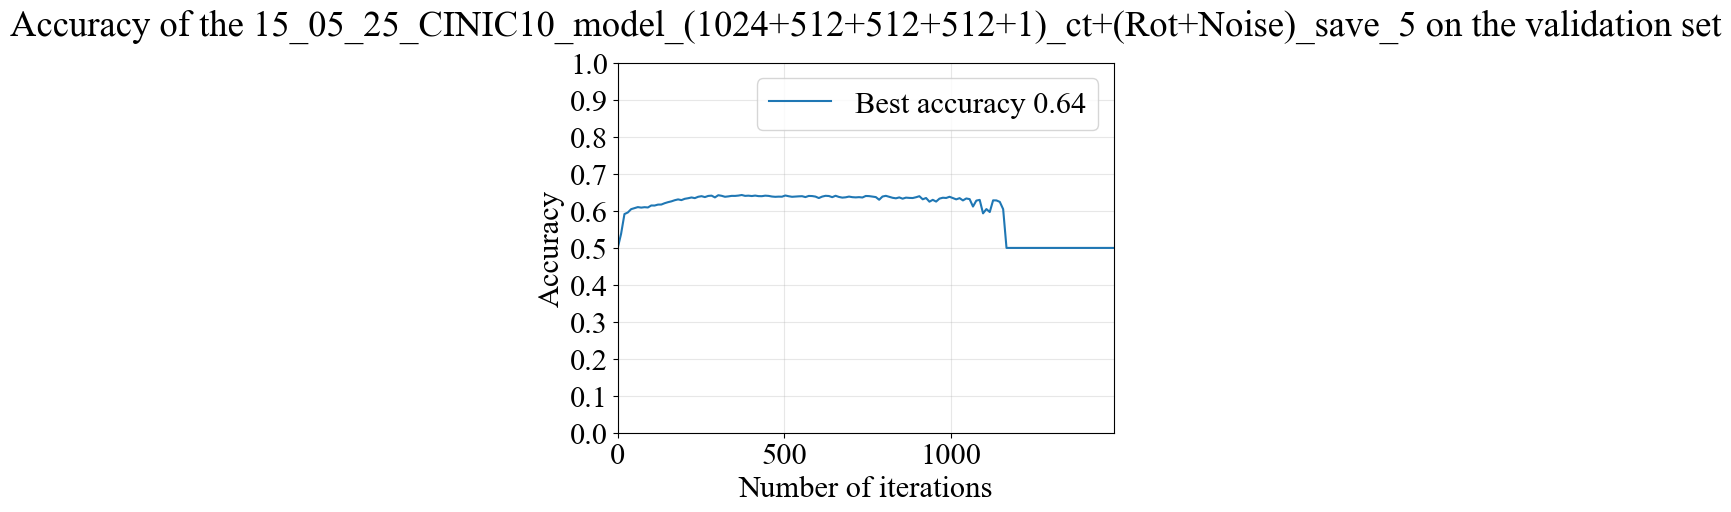

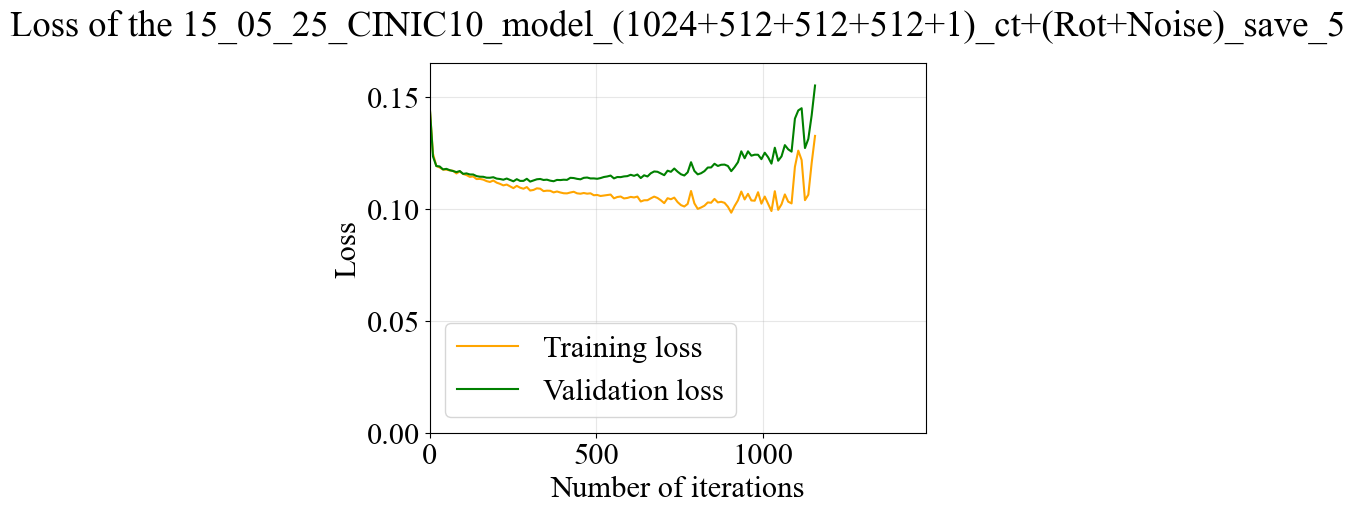

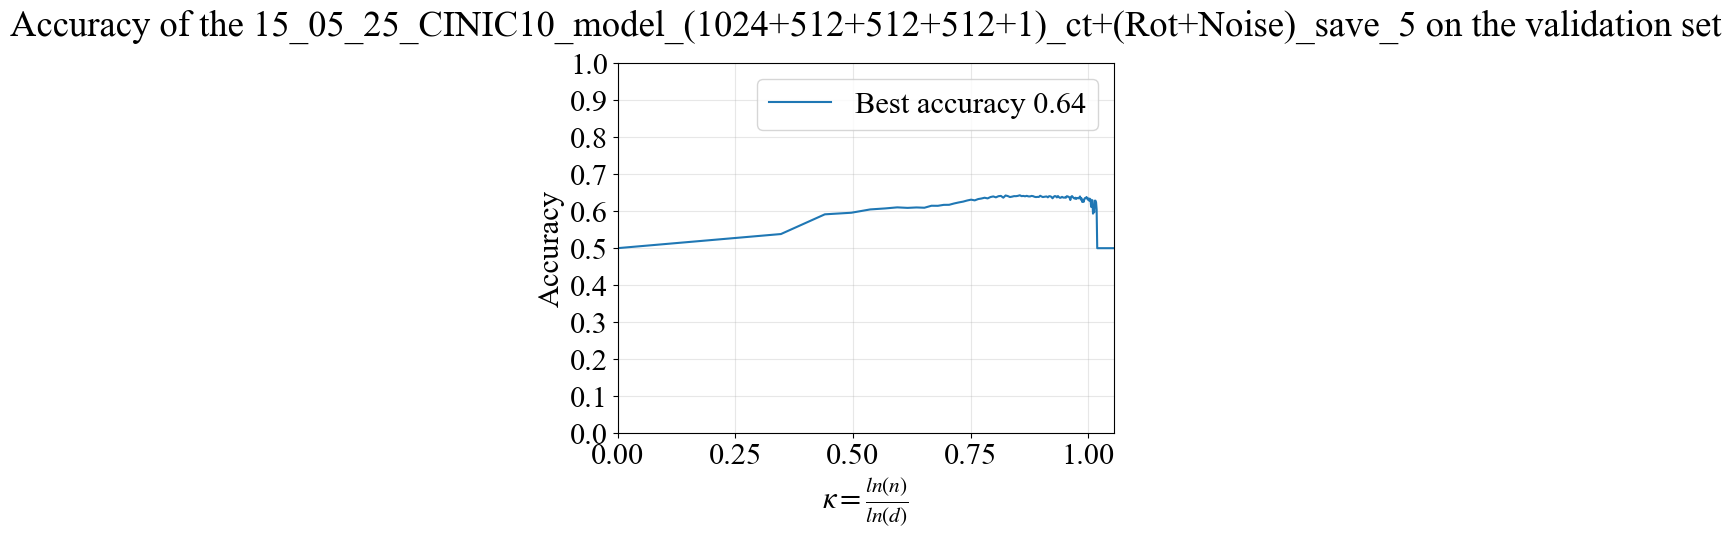

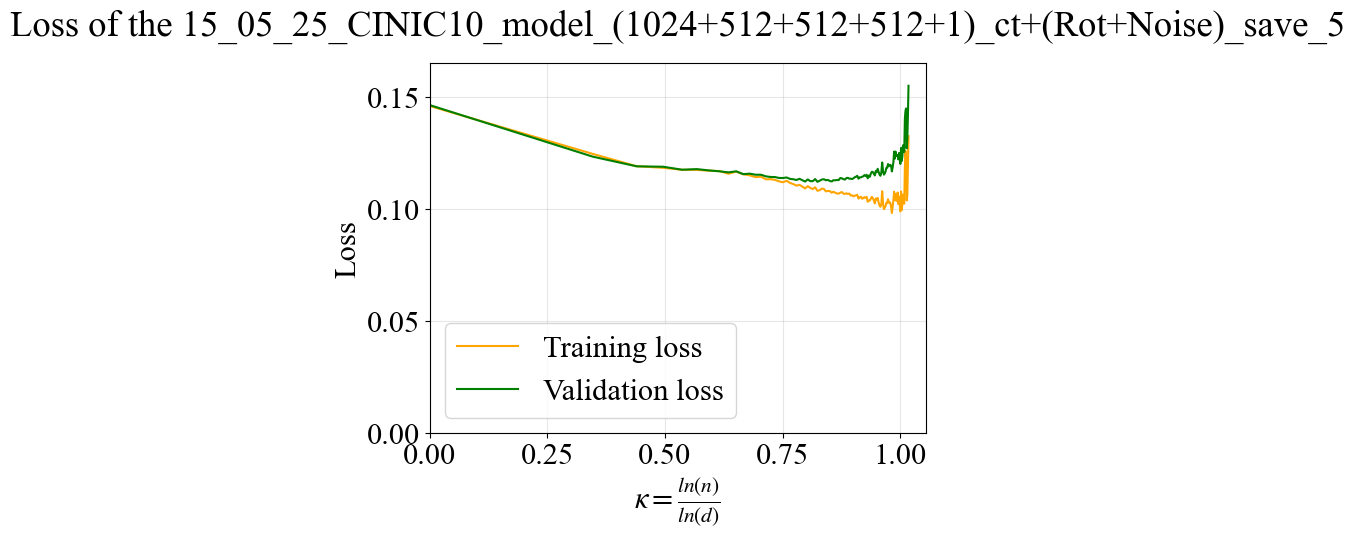

In [74]:
save = True
date = "15_05_25"
if save :
    # Save the model
    model = binary_model_4_layer
    model_name = date + '_CINIC10_model_(1024+512+512+512+1)_ct+(Rot+Noise)_save_5' #
    save_path = "Classifiers/" + date + '/' + model_name + '/'
    os.makedirs(save_path, exist_ok=True)
    torch.save(model , save_path + model_name + ".pt")


    # Save Architecture
    with open(save_path + "architecture.txt", "w", encoding="utf-8") as f:
        f.write(model.architecture + str(model.training_time))

    # Save performances of the model
    os.makedirs(save_path + "figures/", exist_ok=True) 
    # Plot accuracy = f(n)
    plt.plot(np.linspace(0, len(model.accuracy_trajectory)*model.observation_rate, len(model.accuracy_trajectory)), model.accuracy_trajectory, label = "Best accuracy " + str(np.round(np.max(model.accuracy_trajectory), 2)))
    plt.xlim(0, len(model.accuracy_trajectory)*model.observation_rate)
    plt.ylim(0,1)
    plt.yticks(np.linspace(0,1,11))
    plt.xlabel("Number of iterations")  
    plt.ylabel("Accuracy")
    plt.grid(alpha=0.3)
    plt.title("Accuracy of the " + model_name + " on the validation set", pad = 20)
    plt.legend()
    plt.savefig(save_path + "figures/accuracy_of_" + model_name + ".png", bbox_inches='tight')
    plt.savefig(save_path + "figures/accuracy_of_" + model_name + ".svg", bbox_inches='tight')
    data = np.column_stack((np.linspace(0, len(model.accuracy_trajectory)*model.observation_rate, len(model.accuracy_trajectory)), model.accuracy_trajectory)) 
    np.savetxt(save_path +"figures/accuracy_of_" + model_name + ".txt", data, delimiter =",", header="n,accuracy")
    plt.show() 
    
    # Plot training and validation loss = f(n)
    plt.plot(np.linspace(0,len(model.training_loss_trajectory)*model.observation_rate, len(model.training_loss_trajectory)), model.training_loss_trajectory, label = "Training loss", color = "orange")
    plt.plot(np.linspace(0,len(model.validation_loss_trajectory)*model.observation_rate, len(model.validation_loss_trajectory)), model.validation_loss_trajectory, label="Validation loss", color = "green")
    plt.xlim(0, len(model.training_loss_trajectory)*model.observation_rate)
    plt.ylim(0, np.max([np.nan_to_num(model.training_loss_trajectory,nan=0), np.nan_to_num(model.validation_loss_trajectory, nan=0)])+0.01)
    plt.xlabel("Number of iterations")  
    plt.ylabel("Loss")
    plt.grid(alpha=0.3)
    plt.title("Loss of the " + model_name, pad = 20)
    plt.legend()
    plt.savefig(save_path + "figures/loss_of_" + model_name + ".png", bbox_inches='tight')
    plt.savefig(save_path + "figures/loss_of_" + model_name + ".svg", bbox_inches='tight')
    data = np.column_stack((np.linspace(0,len(model.training_loss_trajectory)*model.observation_rate, len(model.training_loss_trajectory)), model.training_loss_trajectory))
    np.savetxt(save_path + "figures/loss_training_of_" + model_name + ".txt", data, delimiter=",", header="n, training_loss")
    data = np.column_stack((np.linspace(0,len(model.validation_loss_trajectory)*model.observation_rate, len(model.validation_loss_trajectory)), model.validation_loss_trajectory))
    np.savetxt(save_path + "figures/validation_loss_of_" + model_name + ".txt", data, delimiter=",", header="n, validation_loss")
    plt.show()
    
    # Plot accuracy = f(kappa)
    kappa = [np.log(n)/np.log(model.input_dimension) for n in np.linspace(1, len(model.accuracy_trajectory)*model.observation_rate+1, len(model.accuracy_trajectory))]
    plt.plot(kappa, model.accuracy_trajectory, label = "Best accuracy " + str(np.round(np.max(model.accuracy_trajectory), 2)))
    plt.xlim(0, np.max(kappa))
    plt.ylim(0,1)
    plt.yticks(np.linspace(0,1,11))
    plt.xlabel(r"$\kappa  = \frac{ln(n)}{ln(d)}$")  
    plt.ylabel("Accuracy")
    plt.grid(alpha=0.3)
    plt.title("Accuracy of the " + model_name + " on the validation set", pad = 20)
    plt.legend()
    plt.savefig(save_path + "figures/kappa_accuracy_of_" + model_name + ".png", bbox_inches='tight')
    plt.savefig(save_path + "figures/kappa_accuracy_of_" + model_name + ".svg", bbox_inches='tight')
    data = np.column_stack((kappa, model.accuracy_trajectory))
    np.savetxt(save_path + "figures/kappa_accuracy_" + model_name + ".txt", data, delimiter=",", header="kappa, accuracy")
    plt.show()
    
    # Plot training and validation loss
    kappa = [np.log(n)/np.log(model.input_dimension) for n in np.linspace(1, len(model.training_loss_trajectory)*model.observation_rate, len(model.training_loss_trajectory))]
    plt.plot(kappa, model.training_loss_trajectory, label = "Training loss", color = "orange")
    plt.plot(kappa, model.validation_loss_trajectory, label = "Validation loss", color = "green")
    plt.xlim(0, np.max(kappa))
    plt.ylim(0, np.max([np.nan_to_num(model.training_loss_trajectory,nan=0), np.nan_to_num(model.validation_loss_trajectory, nan=0)])+0.01)
    plt.xlabel(r"$\kappa  = \frac{ln(n)}{ln(d)}$")  
    plt.ylabel("Loss")
    plt.grid(alpha=0.3)
    plt.title("Loss of the " + model_name, pad = 20)
    plt.legend()
    plt.savefig(save_path + "figures/kappa_loss_of_" + model_name + ".png", bbox_inches='tight')
    plt.savefig(save_path + "figures/kappa_loss_of_" + model_name + ".svg", bbox_inches='tight')
    data_training = np.column_stack((kappa, model.training_loss_trajectory))
    np.savetxt(save_path + "figures/kappa_loss_training_" + model_name + ".txt", data_training, delimiter=",", header="kappa, training_loss")
    data_validation = np.column_stack((kappa, model.validation_loss_trajectory))
    np.savetxt(save_path + "figures/kappa_loss_validation_" + model_name + ".txt", data_validation, delimiter=",", header="kappa, validation_loss")
    plt.show()
    
else:
    print("No save")


In [46]:
os.makedirs('Post-processing/13_05_25/Accuracies_of_models/Dataset_2_ctpb/')

In [41]:
def lower_envelope(x,y):
    minima_idx = argrelextrema(y, np.less, order=5)[0]
    x_sampled = x[minima_idx]
    y = y[minima_idx]
    interp = interp1d(x_sampled, y, kind='linear', fill_value='extrapolate')
    y = interp(x)
    return np.array([x, y]).transpose()

def upper_envelope(x,y):
    maxima_idx = argrelextrema(y, np.greater, order=5)[0]
    x_sampled = x[maxima_idx]
    y = y[maxima_idx]
    interp = interp1d(x_sampled, y, kind='linear', fill_value='extrapolate')
    y = interp(x)
    return np.array([x, y]).transpose()

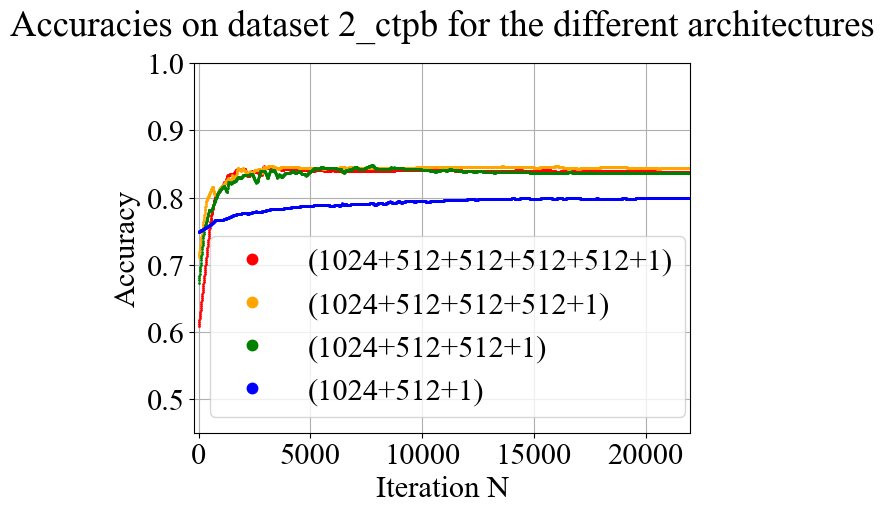

In [47]:
# Import model and plot performances

date = '13_05_25'
save_path = 'Post-processing/13_05_25/Accuracies_of_models/Dataset_2_ctpb/'

# Plot the performances
model_name_1 = "CIFAR10_model_(1024+512+1)_2_ctpb"
model_name_2 = "CIFAR10_model_(1024+512+512+1)_2_ctpb"
model_name_3 = "CIFAR10_model_(1024+512+512+512+1)_2_ctpb"
model_name_4 = "CIFAR10_model_(1024+512+512+512+512+1)_2_ctpb"

curve_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/accuracy_of_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_model_2 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_2 + '/figures/accuracy_of_' + date + '_' + model_name_2 +'.txt', delimiter=",", skiprows=1)
curve_model_3 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_3 + '/figures/accuracy_of_' + date + '_' + model_name_3 +'.txt', delimiter=",", skiprows=1)
curve_model_4 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_4 + '/figures/accuracy_of_' + date + '_' + model_name_4 +'.txt', delimiter=",", skiprows=1)

curve_model_1 = upper_envelope(curve_model_1[:, 0], curve_model_1[:, 1])
curve_model_2 = upper_envelope(curve_model_2[:, 0], curve_model_2[:, 1])
curve_model_3 = upper_envelope(curve_model_3[:, 0], curve_model_3[:, 1])
curve_model_4 = upper_envelope(curve_model_4[:, 0], curve_model_4[:, 1])

plt.plot(curve_model_4[:, 0], curve_model_4[:, 1], '.', markersize = '2', color = 'red', label = '(1024+512+512+512+512+1)')
plt.plot(curve_model_3[:, 0], curve_model_3[:, 1], '.', markersize = '2', color = 'orange', label = '(1024+512+512+512+1)')
plt.plot(curve_model_2[:, 0], curve_model_2[:, 1], '.', markersize = '2', color = 'green', label = '(1024+512+512+1)')
plt.plot(curve_model_1[:, 0], curve_model_1[:, 1], '.', markersize = '2', color = 'blue', label = '(1024+512+1)')

plt.xlim(-200,22000)
plt.ylim(0.45,1)
plt.grid()
plt.xlabel('Iteration N')
plt.ylabel('Accuracy')
plt.title('Accuracies on dataset 2_ctpb for the different architectures', pad = 20)
legend = plt.legend()
for handle in legend.legend_handles:
    handle.set_markersize(15)
plt.savefig(save_path + "Zoomed_Comparison_accuracy_dataset_2_ctpb.png", bbox_inches='tight')
plt.savefig(save_path + "Zoomed_Comparison_accuracy_dataset_2_ctpb.svg", bbox_inches='tight')
plt.show()
# Plots of performances
# accuracy = mpimg.imread("Classifiers/" + model_name + "/figures/accuracy_of_" + model_name + ".png")
# plt.imshow(accuracy)
# kappa_accuracy = mpimg.imread("Classifiers/" + model_name + "/figures/kappa_accuracy_of_" + model_name + ".png")
# plt.imshow(kappa_accuracy)
# loss = mpimg.imread("Classifiers/" + model_name + "/figures/loss_of_" + model_name + ".png")
# plt.imshow(loss)
# kappa_loss = mpimg.imread("Classifiers/" + model_name + "/figures/kappa_loss_of_" + model_name + ".png")
# plt.imshow(kappa_loss)
# plt.show()

# Import datas
# accuracy_data = np.loadtxt("Classifiers/" + model_name + "/figures/accuracy_of_" + model_name + ".txt", delimiter=",", skiprows=1)
# loss_data = np.loadtxt("Classifiers/" + model_name + "/figures/loss_of_" + model_name + ".txt", delimiter=",", skiprows=1)
# kappa_accuracy_data = np.loadtxt("Classifiers/" + model_name + "/figures/kappa_accuracy_" + model_name + ".txt", delimiter=",", skiprows=1)
# kappa_loss_data = np.loadtxt("Classifiers/" + model_name + "/figures/kappa_loss_of_" + model_name + ".txt", delimiter=",", skiprows=1)


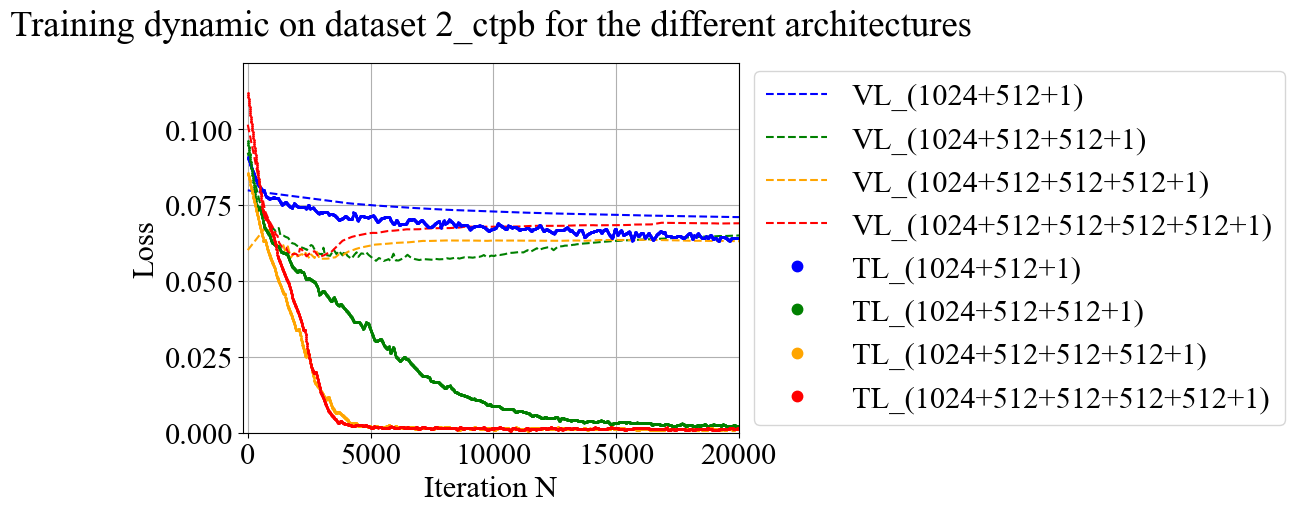

In [43]:

# Import model and plot performances

date = '13_05_25'
save_path = 'Post-processing/13_05_25/Overfitting_dynamic/Dataset_2_ctpb/'

# Plot the performances
model_name_1 = "CIFAR10_model_(1024+512+1)_2_ctpb"
model_name_2 = "CIFAR10_model_(1024+512+512+1)_2_ctpb"
model_name_3 = "CIFAR10_model_(1024+512+512+512+1)_2_ctpb"
model_name_4 = "CIFAR10_model_(1024+512+512+512+512+1)_2_ctpb"

curve_TL_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/loss_training_of_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_TL_model_2 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_2 + '/figures/loss_training_of_' + date + '_' + model_name_2 +'.txt', delimiter=",", skiprows=1)
curve_TL_model_3 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_3 + '/figures/loss_training_of_' + date + '_' + model_name_3 +'.txt', delimiter=",", skiprows=1)
curve_TL_model_4 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_4 + '/figures/loss_training_of_' + date + '_' + model_name_4 +'.txt', delimiter=",", skiprows=1)


curve_VL_model_1 =  np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/validation_loss_of_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_VL_model_2 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_2 + '/figures/validation_loss_of_' + date + '_' + model_name_2 +'.txt', delimiter=",", skiprows=1)
curve_VL_model_3 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_3 + '/figures/validation_loss_of_' + date + '_' + model_name_3 +'.txt', delimiter=",", skiprows=1)
curve_VL_model_4 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_4 + '/figures/validation_loss_of_' + date + '_' + model_name_4 +'.txt', delimiter=",", skiprows=1)


# Extracting the lower envelope
curve_VL_model_1 = lower_envelope(curve_VL_model_1[:, 0], curve_VL_model_1[:, 1])
curve_VL_model_2 = lower_envelope(curve_VL_model_2[:, 0], curve_VL_model_2[:, 1])
curve_VL_model_3 = lower_envelope(curve_VL_model_3[:, 0], curve_VL_model_3[:, 1])
curve_VL_model_4 = lower_envelope(curve_VL_model_4[:, 0], curve_VL_model_4[:, 1])

curve_TL_model_1 = lower_envelope(curve_TL_model_1[:, 0], curve_TL_model_1[:, 1])
curve_TL_model_2 = lower_envelope(curve_TL_model_2[:, 0], curve_TL_model_2[:, 1])
curve_TL_model_3 = lower_envelope(curve_TL_model_3[:, 0], curve_TL_model_3[:, 1])
curve_TL_model_4 = lower_envelope(curve_TL_model_4[:, 0], curve_TL_model_4[:, 1])

plt.plot(curve_VL_model_1[:, 0], curve_VL_model_1[:, 1],'--', color = 'blue', label = 'VL_(1024+512+1)')
plt.plot(curve_VL_model_2[:, 0], curve_VL_model_2[:, 1],'--', color = 'green', label = 'VL_(1024+512+512+1)')
plt.plot(curve_VL_model_3[:, 0], curve_VL_model_3[:, 1],'--', color = 'orange', label = 'VL_(1024+512+512+512+1)')
plt.plot(curve_VL_model_4[:, 0], curve_VL_model_4[:, 1],'--', color = 'red', label = 'VL_(1024+512+512+512+512+1)')

plt.plot(curve_TL_model_1[:, 0], curve_TL_model_1[:, 1], '.', markersize = '2', color = 'blue', label = 'TL_(1024+512+1)')
plt.plot(curve_TL_model_2[:, 0], curve_TL_model_2[:, 1], '.', markersize = '2', color = 'green', label = 'TL_(1024+512+512+1)')
plt.plot(curve_TL_model_3[:, 0], curve_TL_model_3[:, 1], '.', markersize = '2', color = 'orange', label = 'TL_(1024+512+512+512+1)')
plt.plot(curve_TL_model_4[:, 0], curve_TL_model_4[:, 1], '.', markersize = '2', color = 'red', label = 'TL_(1024+512+512+512+512+1)')

plt.xlim(-200,20000)
plt.ylim(0,np.max([np.max(curve_TL_model_4[:, 1]), np.max(curve_TL_model_3[:, 1]), np.max(curve_TL_model_2[:, 1]), np.max(curve_TL_model_1[:, 1])]) + 0.01)
plt.grid()
plt.xlabel('Iteration N')
plt.ylabel('Loss')
plt.title('Training dynamic on dataset 2_ctpb for the different architectures', pad = 20)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for handle in legend.legend_handles:
    handle.set_markersize(15)   
plt.savefig(save_path + "Comparison_overfitting_dynamic_dataset_2_ctpb.png", bbox_inches='tight')
plt.savefig(save_path + "Comparison_overfitting_dynammic_dataset_2_ctpb.svg", bbox_inches='tight')
plt.show()

# plt.savefig(save_path + "Zoomed_Comparison_accuracy_dataset_3.png", bbox_inches='tight')
# plt.savefig(save_path + "Zoomed_Comparison_accuracy_dataset_3.svg", bbox_inches='tight')
# plt.show()
# Plots of performances
# accuracy = mpimg.imread("Classifiers/" + model_name + "/figures/accuracy_of_" + model_name + ".png")
# plt.imshow(accuracy)
# kappa_accuracy = mpimg.imread("Classifiers/" + model_name + "/figures/kappa_accuracy_of_" + model_name + ".png")
# plt.imshow(kappa_accuracy)
# loss = mpimg.imread("Classifiers/" + model_name + "/figures/loss_of_" + model_name + ".png")
# plt.imshow(loss)
# kappa_loss = mpimg.imread("Classifiers/" + model_name + "/figures/kappa_loss_of_" + model_name + ".png")
# plt.imshow(kappa_loss)
# plt.show()

# Import datas
# accuracy_data = np.loadtxt("Classifiers/" + model_name + "/figures/accuracy_of_" + model_name + ".txt", delimiter=",", skiprows=1)
# loss_data = np.loadtxt("Classifiers/" + model_name + "/figures/loss_of_" + model_name + ".txt", delimiter=",", skiprows=1)
# kappa_accuracy_data = np.loadtxt("Classifiers/" + model_name + "/figures/kappa_accuracy_" + model_name + ".txt", delimiter=",", skiprows=1)
# kappa_loss_data = np.loadtxt("Classifiers/" + model_name + "/figures/kappa_loss_of_" + model_name + ".txt", delimiter=",", skiprows=1)


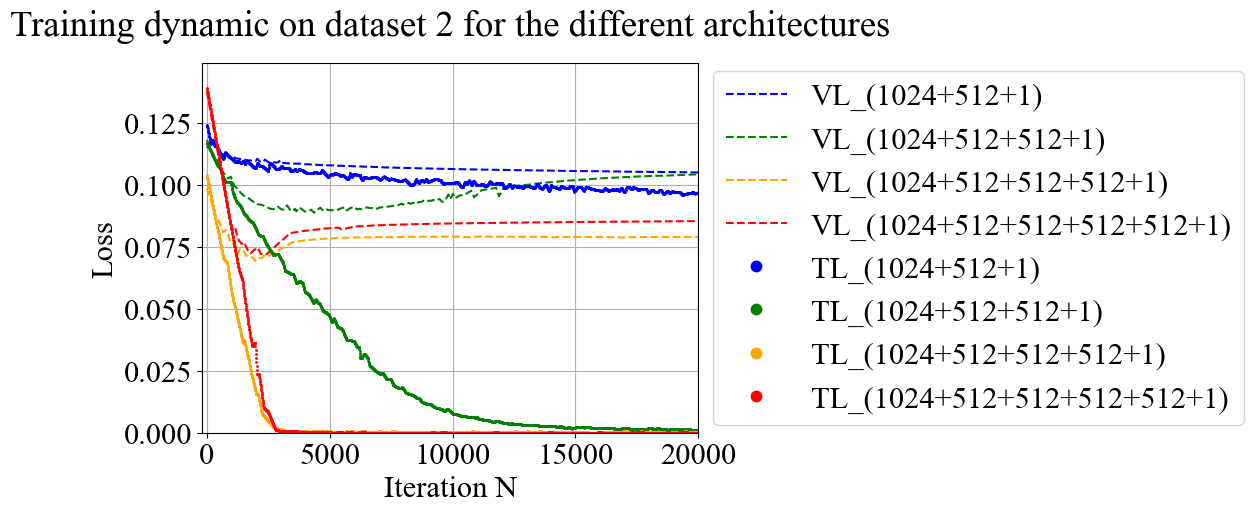

In [44]:

# Import model and plot performances

date = '13_05_25'
save_path = 'Post-processing/13_05_25/Overfitting_dynamic/Dataset_2/'

# Plot the performances
model_name_1 = "CIFAR10_model_(1024+512+1)_2"
model_name_2 = "CIFAR10_model_(1024+512+512+1)_2"
model_name_3 = "CIFAR10_model_(1024+512+512+512+1)_2"
model_name_4 = "CIFAR10_model_(1024+512+512+512+512+1)_2"

curve_x_TL_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/loss_training_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_y_TL_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/kappa_loss_training_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_TL_model_1 = np.concatenate((curve_x_TL_model_1[:,0].reshape(-1,1), curve_y_TL_model_1[:,1].reshape(-1,1)), axis=1)

curve_TL_model_2 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_2 + '/figures/loss_training_of_' + date + '_' + model_name_2 +'.txt', delimiter=",", skiprows=1)
curve_TL_model_3 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_3 + '/figures/loss_training_of_' + date + '_' + model_name_3 +'.txt', delimiter=",", skiprows=1)
curve_TL_model_4 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_4 + '/figures/loss_training_of_' + date + '_' + model_name_4 +'.txt', delimiter=",", skiprows=1)


curve_x_VL_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/loss_training_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_y_VL_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/kappa_loss_validation_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_VL_model_1 = np.concatenate((curve_x_VL_model_1[:,0].reshape(-1,1), curve_y_VL_model_1[:,1].reshape(-1,1)), axis=1)

curve_VL_model_2 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_2 + '/figures/validation_loss_of_' + date + '_' + model_name_2 +'.txt', delimiter=",", skiprows=1)
curve_VL_model_3 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_3 + '/figures/validation_loss_of_' + date + '_' + model_name_3 +'.txt', delimiter=",", skiprows=1)
curve_VL_model_4 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_4 + '/figures/validation_loss_of_' + date + '_' + model_name_4 +'.txt', delimiter=",", skiprows=1)


# Extracting the lower envelope
curve_VL_model_1 = lower_envelope(curve_VL_model_1[:, 0], curve_VL_model_1[:, 1])
curve_VL_model_2 = lower_envelope(curve_VL_model_2[:, 0], curve_VL_model_2[:, 1])
curve_VL_model_3 = lower_envelope(curve_VL_model_3[:, 0], curve_VL_model_3[:, 1])
curve_VL_model_4 = lower_envelope(curve_VL_model_4[:, 0], curve_VL_model_4[:, 1])

curve_TL_model_1 = lower_envelope(curve_TL_model_1[:, 0], curve_TL_model_1[:, 1])
curve_TL_model_2 = lower_envelope(curve_TL_model_2[:, 0], curve_TL_model_2[:, 1])
curve_TL_model_3 = lower_envelope(curve_TL_model_3[:, 0], curve_TL_model_3[:, 1])
curve_TL_model_4 = lower_envelope(curve_TL_model_4[:, 0], curve_TL_model_4[:, 1])

plt.plot(curve_VL_model_1[:, 0], curve_VL_model_1[:, 1],'--', color = 'blue', label = 'VL_(1024+512+1)')
plt.plot(curve_VL_model_2[:, 0], curve_VL_model_2[:, 1],'--', color = 'green', label = 'VL_(1024+512+512+1)')
plt.plot(curve_VL_model_3[:, 0], curve_VL_model_3[:, 1],'--', color = 'orange', label = 'VL_(1024+512+512+512+1)')
plt.plot(curve_VL_model_4[:, 0], curve_VL_model_4[:, 1],'--', color = 'red', label = 'VL_(1024+512+512+512+512+1)')

plt.plot(curve_TL_model_1[:, 0], curve_TL_model_1[:, 1], '.', markersize = '2', color = 'blue', label = 'TL_(1024+512+1)')
plt.plot(curve_TL_model_2[:, 0], curve_TL_model_2[:, 1], '.', markersize = '2', color = 'green', label = 'TL_(1024+512+512+1)')
plt.plot(curve_TL_model_3[:, 0], curve_TL_model_3[:, 1], '.', markersize = '2', color = 'orange', label = 'TL_(1024+512+512+512+1)')
plt.plot(curve_TL_model_4[:, 0], curve_TL_model_4[:, 1], '.', markersize = '2', color = 'red', label = 'TL_(1024+512+512+512+512+1)')

plt.xlim(-200,20000)
plt.ylim(0,np.max([np.max(curve_TL_model_4[:, 1]), np.max(curve_TL_model_3[:, 1]), np.max(curve_TL_model_2[:, 1]), np.max(curve_TL_model_1[:, 1])]) + 0.01)
plt.grid()
plt.xlabel('Iteration N')
plt.ylabel('Loss')
plt.title('Training dynamic on dataset 2 for the different architectures', pad = 20)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for handle in legend.legend_handles:
    handle.set_markersize(15)   
plt.savefig(save_path + "Comparison_overfitting_dynamic_dataset_2.png", bbox_inches='tight')
plt.savefig(save_path + "Comparison_overfitting_dynammic_dataset_2.svg", bbox_inches='tight')
plt.show()

# plt.savefig(save_path + "Zoomed_Comparison_accuracy_dataset_3.png", bbox_inches='tight')
# plt.savefig(save_path + "Zoomed_Comparison_accuracy_dataset_3.svg", bbox_inches='tight')
# plt.show()
# Plots of performances
# accuracy = mpimg.imread("Classifiers/" + model_name + "/figures/accuracy_of_" + model_name + ".png")
# plt.imshow(accuracy)
# kappa_accuracy = mpimg.imread("Classifiers/" + model_name + "/figures/kappa_accuracy_of_" + model_name + ".png")
# plt.imshow(kappa_accuracy)
# loss = mpimg.imread("Classifiers/" + model_name + "/figures/loss_of_" + model_name + ".png")
# plt.imshow(loss)
# kappa_loss = mpimg.imread("Classifiers/" + model_name + "/figures/kappa_loss_of_" + model_name + ".png")
# plt.imshow(kappa_loss)
# plt.show()

# Import datas
# accuracy_data = np.loadtxt("Classifiers/" + model_name + "/figures/accuracy_of_" + model_name + ".txt", delimiter=",", skiprows=1)
# loss_data = np.loadtxt("Classifiers/" + model_name + "/figures/loss_of_" + model_name + ".txt", delimiter=",", skiprows=1)
# kappa_accuracy_data = np.loadtxt("Classifiers/" + model_name + "/figures/kappa_accuracy_" + model_name + ".txt", delimiter=",", skiprows=1)
# kappa_loss_data = np.loadtxt("Classifiers/" + model_name + "/figures/kappa_loss_of_" + model_name + ".txt", delimiter=",", skiprows=1)


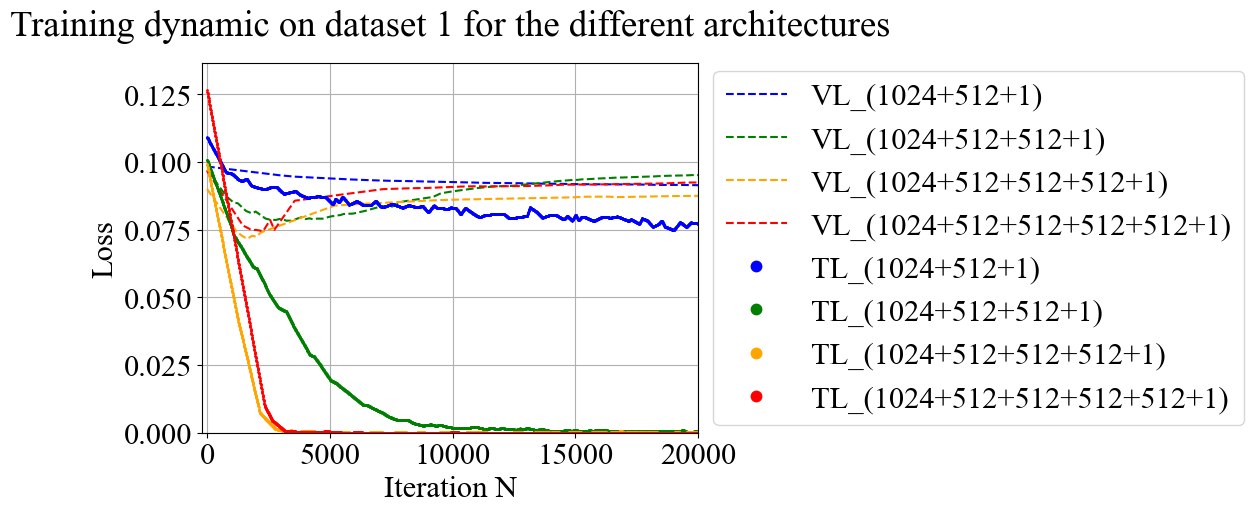

In [20]:

# Import model and plot performances

date = '13_05_25'
save_path = 'Post-processing/13_05_25/Overfitting_dynamic/Dataset_1/'

# Plot the performances
model_name_1 = "CIFAR10_model_(1024+512+1)_1"
model_name_2 = "CIFAR10_model_(1024+512+512+1)_1"
model_name_3 = "CIFAR10_model_(1024+512+512+512+1)_1"
model_name_4 = "CIFAR10_model_(1024+512+512+512+512+1)_1"

curve_y_TL_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/kappa_loss_training_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_y_TL_model_2 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_2 + '/figures/kappa_loss_training_' + date + '_' + model_name_2 +'.txt', delimiter=",", skiprows=1)
curve_y_TL_model_3 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_3 + '/figures/kappa_loss_training_' + date + '_' + model_name_3 +'.txt', delimiter=",", skiprows=1)
curve_y_TL_model_4 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_4 + '/figures/kappa_loss_training_' + date + '_' + model_name_4 +'.txt', delimiter=",", skiprows=1)

curve_x_TL_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/loss_training_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_x_TL_model_2 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_2 + '/figures/loss_training_' + date + '_' + model_name_2 +'.txt', delimiter=",", skiprows=1)
curve_x_TL_model_3 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_3 + '/figures/loss_training_' + date + '_' + model_name_3 +'.txt', delimiter=",", skiprows=1)
curve_x_TL_model_4 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_4 + '/figures/loss_training_' + date + '_' + model_name_4 +'.txt', delimiter=",", skiprows=1)

curve_TL_model_1 = np.concatenate((curve_x_TL_model_1[:,0].reshape(-1,1), curve_y_TL_model_1[:,1].reshape(-1,1)), axis=1)
curve_TL_model_2 = np.concatenate((curve_x_TL_model_2[:,0].reshape(-1,1), curve_y_TL_model_2[:,1].reshape(-1,1)), axis=1)
curve_TL_model_3 = np.concatenate((curve_x_TL_model_3[:,0].reshape(-1,1), curve_y_TL_model_3[:,1].reshape(-1,1)), axis=1)
curve_TL_model_4 = np.concatenate((curve_x_TL_model_4[:,0].reshape(-1,1), curve_y_TL_model_4[:,1].reshape(-1,1)), axis=1)

curve_y_VL_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/kappa_loss_validation_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_y_VL_model_2 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_2 + '/figures/kappa_loss_validation_' + date + '_' + model_name_2 +'.txt', delimiter=",", skiprows=1)
curve_y_VL_model_3 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_3 + '/figures/kappa_loss_validation_' + date + '_' + model_name_3 +'.txt', delimiter=",", skiprows=1)
curve_y_VL_model_4 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_4 + '/figures/kappa_loss_validation_' + date + '_' + model_name_4 +'.txt', delimiter=",", skiprows=1)

curve_x_VL_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/loss_training_' + date + '_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_x_VL_model_2 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_2 + '/figures/loss_training_' + date + '_' + model_name_2 +'.txt', delimiter=",", skiprows=1)
curve_x_VL_model_3 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_3 + '/figures/loss_training_' + date + '_' + model_name_3 +'.txt', delimiter=",", skiprows=1)
curve_x_VL_model_4 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_4 + '/figures/loss_training_' + date + '_' + model_name_4 +'.txt', delimiter=",", skiprows=1)

curve_VL_model_1 = np.concatenate((curve_x_VL_model_1[:,0].reshape(-1,1), curve_y_VL_model_1[:,1].reshape(-1,1)), axis=1)
curve_VL_model_2 = np.concatenate((curve_x_VL_model_2[:,0].reshape(-1,1), curve_y_VL_model_2[:,1].reshape(-1,1)), axis=1)
curve_VL_model_3 = np.concatenate((curve_x_VL_model_3[:,0].reshape(-1,1), curve_y_VL_model_3[:,1].reshape(-1,1)), axis=1)
curve_VL_model_4 = np.concatenate((curve_x_VL_model_4[:,0].reshape(-1,1), curve_y_VL_model_4[:,1].reshape(-1,1)), axis=1)

# Extracting the lower envelope
curve_VL_model_1 = lower_envelope(curve_VL_model_1[:, 0], curve_VL_model_1[:, 1])
curve_VL_model_2 = lower_envelope(curve_VL_model_2[:, 0], curve_VL_model_2[:, 1])
curve_VL_model_3 = lower_envelope(curve_VL_model_3[:, 0], curve_VL_model_3[:, 1])
curve_VL_model_4 = lower_envelope(curve_VL_model_4[:, 0], curve_VL_model_4[:, 1])

curve_TL_model_1 = lower_envelope(curve_TL_model_1[:, 0], curve_TL_model_1[:, 1])
curve_TL_model_2 = lower_envelope(curve_TL_model_2[:, 0], curve_TL_model_2[:, 1])
curve_TL_model_3 = lower_envelope(curve_TL_model_3[:, 0], curve_TL_model_3[:, 1])
curve_TL_model_4 = lower_envelope(curve_TL_model_4[:, 0], curve_TL_model_4[:, 1])

plt.plot(curve_VL_model_1[:, 0], curve_VL_model_1[:, 1],'--', color = 'blue', label = 'VL_(1024+512+1)')
plt.plot(curve_VL_model_2[:, 0], curve_VL_model_2[:, 1],'--', color = 'green', label = 'VL_(1024+512+512+1)')
plt.plot(curve_VL_model_3[:, 0], curve_VL_model_3[:, 1],'--', color = 'orange', label = 'VL_(1024+512+512+512+1)')
plt.plot(curve_VL_model_4[:, 0], curve_VL_model_4[:, 1],'--', color = 'red', label = 'VL_(1024+512+512+512+512+1)')

plt.plot(curve_TL_model_1[:, 0], curve_TL_model_1[:, 1], '.', markersize = '2', color = 'blue', label = 'TL_(1024+512+1)')
plt.plot(curve_TL_model_2[:, 0], curve_TL_model_2[:, 1], '.', markersize = '2', color = 'green', label = 'TL_(1024+512+512+1)')
plt.plot(curve_TL_model_3[:, 0], curve_TL_model_3[:, 1], '.', markersize = '2', color = 'orange', label = 'TL_(1024+512+512+512+1)')
plt.plot(curve_TL_model_4[:, 0], curve_TL_model_4[:, 1], '.', markersize = '2', color = 'red', label = 'TL_(1024+512+512+512+512+1)')

plt.xlim(-200,20000)
plt.ylim(0,np.max([np.max(curve_TL_model_4[:, 1]), np.max(curve_TL_model_3[:, 1]), np.max(curve_TL_model_2[:, 1]), np.max(curve_TL_model_1[:, 1])]) + 0.01)
plt.grid()
plt.xlabel('Iteration N')
plt.ylabel('Loss')
plt.title('Training dynamic on dataset 1 for the different architectures', pad = 20)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for handle in legend.legend_handles:
    handle.set_markersize(15)   
plt.savefig(save_path + "Comparison_overfitting_dynamic_dataset_1.png", bbox_inches='tight')
plt.savefig(save_path + "Comparison_overfitting_dynammic_dataset_1.svg", bbox_inches='tight')
plt.show()

# plt.savefig(save_path + "Zoomed_Comparison_accuracy_dataset_3.png", bbox_inches='tight')
# plt.savefig(save_path + "Zoomed_Comparison_accuracy_dataset_3.svg", bbox_inches='tight')
# plt.show()
# Plots of performances
# accuracy = mpimg.imread("Classifiers/" + model_name + "/figures/accuracy_of_" + model_name + ".png")
# plt.imshow(accuracy)
# kappa_accuracy = mpimg.imread("Classifiers/" + model_name + "/figures/kappa_accuracy_of_" + model_name + ".png")
# plt.imshow(kappa_accuracy)
# loss = mpimg.imread("Classifiers/" + model_name + "/figures/loss_of_" + model_name + ".png")
# plt.imshow(loss)
# kappa_loss = mpimg.imread("Classifiers/" + model_name + "/figures/kappa_loss_of_" + model_name + ".png")
# plt.imshow(kappa_loss)
# plt.show()

# Import datas
# accuracy_data = np.loadtxt("Classifiers/" + model_name + "/figures/accuracy_of_" + model_name + ".txt", delimiter=",", skiprows=1)
# loss_data = np.loadtxt("Classifiers/" + model_name + "/figures/loss_of_" + model_name + ".txt", delimiter=",", skiprows=1)
# kappa_accuracy_data = np.loadtxt("Classifiers/" + model_name + "/figures/kappa_accuracy_" + model_name + ".txt", delimiter=",", skiprows=1)
# kappa_loss_data = np.loadtxt("Classifiers/" + model_name + "/figures/kappa_loss_of_" + model_name + ".txt", delimiter=",", skiprows=1)


2 layers - Training first layer : True - Training second layer : True - kappa = 2.45 - lr = 1e-05 - lr_decay_rate = 100000000.0 - reg1 = 0 - reg2 = 0 - eps_init = 1 - fraction_batch = 0.2 - observation rate = 10 - Train layer 1 = True - Train layer 2 = True - Dropout rate = 0.4
[0.         0.48416665]


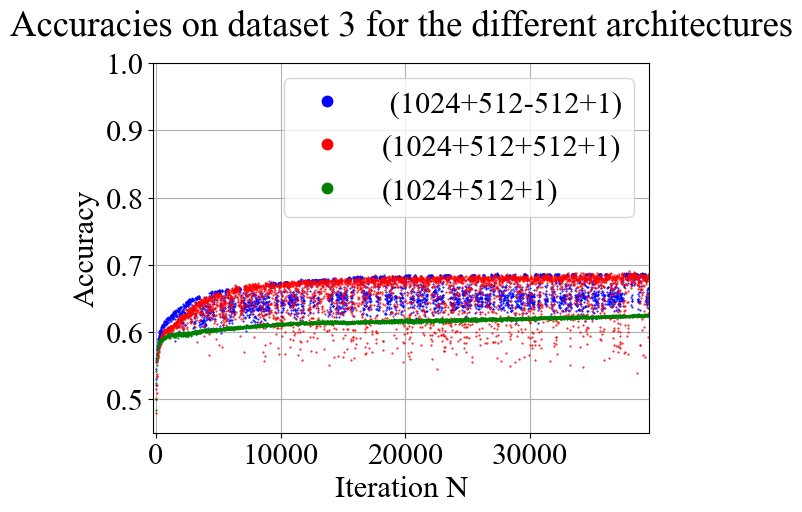

In [10]:
# Import model and plot performances

date = '07_05_25'
model_name = "CIFAR10_model_(1024+512+1)_save_3"
curve_datas = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name + '/figures/accuracy_of_' + model_name +'.txt', delimiter=",", skiprows=1)
assessed_model = torch.load('Classifiers/' + date + '/' + date + '_' +  model_name + '/' + model_name + ".pt", weights_only=False)
save_path = 'Post-processing/08_05_25/Dataset_3/'
# Details of the model
print(assessed_model.architecture)

# Plot the performances
model_name_1 = "CIFAR10_model_(1024+512+1)_3"
model_name_2 = "CIFAR10_model_(1024+512+512+1)_3"
model_name_3 = "CIFAR10_model_(1024+512-512+1)_3"

curve_datas_model_1 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_1 + '/figures/accuracy_of_' + model_name_1 +'.txt', delimiter=",", skiprows=1)
curve_datas_model_2 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_2 + '/figures/accuracy_of_' + date + '_' + model_name_2 +'.txt', delimiter=",", skiprows=1)
curve_datas_model_3 = np.loadtxt('Classifiers/' + date + '/' + date + '_' +  model_name_3 + '/figures/accuracy_of_' + model_name_3 +'.txt', delimiter=",", skiprows=1)

print(curve_datas_model_1[0])
plt.plot(curve_datas_model_3[:, 0], curve_datas_model_3[:, 1], '.', markersize = '1', color = 'blue', label = ' (1024+512-512+1)')
plt.plot(curve_datas_model_2[:, 0], curve_datas_model_2[:, 1], '.', markersize = '1', color = 'red', label = '(1024+512+512+1)')
plt.plot(curve_datas_model_1[:, 0], curve_datas_model_1[:, 1], '.', markersize = '1', color = 'green', label = '(1024+512+1)')
plt.xlim(-200,np.min([np.max(curve_datas_model_1[:, 0]), np.max(curve_datas_model_2[:, 0]), np.max(curve_datas_model_3[:, 0])]))
plt.ylim(0.45,1)
plt.grid()
plt.xlabel('Iteration N')
plt.ylabel('Accuracy')
plt.title('Accuracies on dataset 3 for the different architectures', pad = 20)
legend = plt.legend()
for handle in legend.legend_handles:
    handle.set_markersize(15)
plt.savefig(save_path + "Zoomed_Comparison_accuracy_dataset_3.png", bbox_inches='tight')
plt.savefig(save_path + "Zoomed_Comparison_accuracy_dataset_3.svg", bbox_inches='tight')
plt.show()
# Plots of performances
# accuracy = mpimg.imread("Classifiers/" + model_name + "/figures/accuracy_of_" + model_name + ".png")
# plt.imshow(accuracy)
# kappa_accuracy = mpimg.imread("Classifiers/" + model_name + "/figures/kappa_accuracy_of_" + model_name + ".png")
# plt.imshow(kappa_accuracy)
# loss = mpimg.imread("Classifiers/" + model_name + "/figures/loss_of_" + model_name + ".png")
# plt.imshow(loss)
# kappa_loss = mpimg.imread("Classifiers/" + model_name + "/figures/kappa_loss_of_" + model_name + ".png")
# plt.imshow(kappa_loss)
# plt.show()

# Import datas
# accuracy_data = np.loadtxt("Classifiers/" + model_name + "/figures/accuracy_of_" + model_name + ".txt", delimiter=",", skiprows=1)
# loss_data = np.loadtxt("Classifiers/" + model_name + "/figures/loss_of_" + model_name + ".txt", delimiter=",", skiprows=1)
# kappa_accuracy_data = np.loadtxt("Classifiers/" + model_name + "/figures/kappa_accuracy_" + model_name + ".txt", delimiter=",", skiprows=1)
# kappa_loss_data = np.loadtxt("Classifiers/" + model_name + "/figures/kappa_loss_of_" + model_name + ".txt", delimiter=",", skiprows=1)
